### Column

- age: 나이

- height: 키

- weight: 몸무게

- waist: 허리

- eyesight(left): 시력(왼)

- eyesight(light): 시력(오)

- hearing(left): 청력(왼)

- hearing(light): 청력(오)

- systolic: 수축기 혈압

- relaxation: 이완기 혈압

- fasting blood sugar: 공복혈당

- Cholesterol: 콜레스테롤

- triglyceride: 중성지방

- HDL: 고밀도 지단백

- LDL: 저밀도 지단백

- hemoglobin: 헤모글로빈

- Urine protein: 요단백

- serum creatinine: 혈청크레아티닌

- AST: 간수치 AST

- ALT: 간수치 ALT

- Gtp: 감마 Gtp

- dental caries: 충치여부

- smoking: 흡연여부

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

#### 원본 데이터를 통해 train, test 데이터 늘리기 (학습 정확도 상승을 위해)

In [ ]:
train_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train.csv')
train_data_original = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train_dataset.csv')

train = pd.concat([train_data, train_data_original]).reset_index(drop = True)

In [ ]:
test_data = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test.csv')
test_data_original = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test_dataset.csv')

test = pd.concat([test_data, test_data_original]).reset_index(drop = True)

#### train 데이터의 id 컬럼 제거

In [ ]:
train = train.drop(columns='id', axis=1)
train


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198235,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
198236,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
198237,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
198238,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
test = test.drop(columns='id', axis=1)
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122874,60,165,65,82.0,0.7,1.0,1,1,101,68,...,131,41,110,13.5,1,0.8,78,75,33,0
122875,60,155,70,93.0,0.8,1.0,1,1,134,70,...,259,53,60,13.9,1,0.7,19,28,28,1
122876,40,155,50,67.2,0.9,0.8,1,1,134,80,...,50,64,131,13.4,1,0.7,16,10,14,0
122877,35,165,70,76.1,1.0,1.0,1,1,114,68,...,43,74,118,14.3,1,1.2,19,28,30,1


In [ ]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [ ]:
test.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [ ]:
col_list = ['나이',
 '키(cm)',
 '몸무게(kg)',
 '허리(cm)',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '공복혈당',
 '콜레스테롤',
 '중성지방',
 '고밀도 지단백(HDL)',
 '저밀도 지단백(LDL)',
 '헤모글로빈',
 '요단백(Urine protein)',
 '혈청크레아티닌',
 '간세포 손상 수치 AST',
 '간세포 손상 수치 ALT',
 '감마 Gtp(간효소)',
 '충치 여부',
 '흡연 여부']

In [ ]:
col_list2 = ['나이',
 '키(cm)',
 '몸무게(kg)',
 '허리(cm)',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기 혈압',
 '이완기 혈압',
 '공복혈당',
 '콜레스테롤',
 '중성지방',
 '고밀도 지단백(HDL)',
 '저밀도 지단백(LDL)',
 '헤모글로빈',
 '요단백(Urine protein)',
 '혈청크레아티닌',
 '간세포 손상 수치 AST',
 '간세포 손상 수치 ALT',
 '감마 Gtp(간효소)',
 '충치 여부']

In [ ]:
train.columns = col_list

In [ ]:
test.columns = col_list2

In [ ]:
train

,나이,키(cm),몸무게(kg),허리(cm),시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,고밀도 지단백(HDL),저밀도 지단백(LDL),헤모글로빈,요단백(Urine protein),혈청크레아티닌,간세포 손상 수치 AST,간세포 손상 수치 ALT,감마 Gtp(간효소),충치 여부,흡연 여부
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198235,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
198236,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
198237,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
198238,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
test

,나이,키(cm),몸무게(kg),허리(cm),시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,중성지방,고밀도 지단백(HDL),저밀도 지단백(LDL),헤모글로빈,요단백(Urine protein),혈청크레아티닌,간세포 손상 수치 AST,간세포 손상 수치 ALT,감마 Gtp(간효소),충치 여부
0,40,165,70,84.0,1.2,1.2,1,1,130,89,...,186,49,115,14.2,1,0.9,19,25,32,0
1,80,160,60,93.0,1.0,1.0,2,2,144,72,...,158,35,104,13.0,1,1.1,20,12,24,0
2,60,170,70,86.5,0.6,0.7,1,1,117,75,...,173,39,88,15.4,1,1.4,38,60,36,0
3,40,160,50,67.0,0.3,0.4,1,1,116,62,...,47,75,128,14.5,1,0.6,25,18,10,1
4,40,170,75,89.4,1.0,0.9,1,1,132,94,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122874,60,165,65,82.0,0.7,1.0,1,1,101,68,...,131,41,110,13.5,1,0.8,78,75,33,0
122875,60,155,70,93.0,0.8,1.0,1,1,134,70,...,259,53,60,13.9,1,0.7,19,28,28,1
122876,40,155,50,67.2,0.9,0.8,1,1,134,80,...,50,64,131,13.4,1,0.7,16,10,14,0
122877,35,165,70,76.1,1.0,1.0,1,1,114,68,...,43,74,118,14.3,1,1.2,19,28,30,1


In [ ]:
train.columns

Index(['나이', '키(cm)', '몸무게(kg)', '허리(cm)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기 혈압', '이완기 혈압', '공복혈당', '콜레스테롤', '중성지방', '고밀도 지단백(HDL)',
       '저밀도 지단백(LDL)', '헤모글로빈', '요단백(Urine protein)', '혈청크레아티닌',
       '간세포 손상 수치 AST', '간세포 손상 수치 ALT', '감마 Gtp(간효소)', '충치 여부', '흡연 여부'],
      dtype='object')

In [ ]:
test.columns

Index(['나이', '키(cm)', '몸무게(kg)', '허리(cm)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기 혈압', '이완기 혈압', '공복혈당', '콜레스테롤', '중성지방', '고밀도 지단백(HDL)',
       '저밀도 지단백(LDL)', '헤모글로빈', '요단백(Urine protein)', '혈청크레아티닌',
       '간세포 손상 수치 AST', '간세포 손상 수치 ALT', '감마 Gtp(간효소)', '충치 여부'],
      dtype='object')

### 이상치 제거

In [ ]:
train['청력(좌)'].unique()

array([1, 2])

In [ ]:
train['청력(우)'].unique()

array([1, 2])

In [ ]:
test['청력(좌)'].unique()

array([1, 2])

In [ ]:
test['청력(우)'].unique()

array([1, 2])

In [ ]:
best = np.where(train['청력(좌)'] < train['청력(우)'],
                train['청력(좌)'],  train['청력(우)'])
worst = np.where(train['청력(좌)'] < train['청력(우)'],
                 train['청력(우)'],  train['청력(좌)'])
train['청력(좌)'] = best - 1
train['청력(우)'] = worst - 1

In [ ]:
train['청력(좌)'].unique()

array([0, 1])

In [ ]:
train['청력(우)'].unique()

array([0, 1])

In [ ]:
best = np.where(test['청력(좌)'] < test['청력(우)'],
                test['청력(좌)'],  test['청력(우)'])
worst = np.where(test['청력(좌)'] < test['청력(우)'],
                 test['청력(우)'],  test['청력(좌)'])
test['청력(좌)'] = best - 1
test['청력(우)'] = worst - 1

In [ ]:
test['청력(좌)'].unique()

array([0, 1])

In [ ]:
test['청력(우)'].unique()

array([0, 1])

In [ ]:
train['감마 Gtp(간효소)'] = np.clip(train['감마 Gtp(간효소)'], 0, 300)
train['고밀도 지단백(HDL)'] = np.clip(train['고밀도 지단백(HDL)'], 0, 110)
train['저밀도 지단백(LDL)'] = np.clip(train['저밀도 지단백(LDL)'], 0, 200)
train['간세포 손상 수치 ALT'] = np.clip(train['간세포 손상 수치 ALT'], 0, 150)
train['간세포 손상 수치 AST'] = np.clip(train['간세포 손상 수치 AST'], 0, 100)
train['혈청크레아티닌'] = np.clip(train['혈청크레아티닌'], 0, 3)

In [ ]:
test['감마 Gtp(간효소)'] = np.clip(test['감마 Gtp(간효소)'], 0, 300)
test['고밀도 지단백(HDL)'] = np.clip(test['고밀도 지단백(HDL)'], 0, 110)
test['저밀도 지단백(LDL)'] = np.clip(test['저밀도 지단백(LDL)'], 0, 200)
test['간세포 손상 수치 ALT'] = np.clip(test['간세포 손상 수치 ALT'], 0, 150)
test['간세포 손상 수치 AST'] = np.clip(test['간세포 손상 수치 AST'], 0, 100)
test['혈청크레아티닌'] = np.clip(test['혈청크레아티닌'], 0, 3)

In [ ]:
train['시력(좌)'].unique()

array([0.5, 0.6, 0.4, 1.5, 1.2, 0.7, 0.8, 1. , 2. , 0.9, 0.3, 0.1, 0.2,
       9.9, 1.9, 1.6, 1.1, 1.8, 1.3, 1.7])

In [ ]:
train['시력(우)'].unique()

array([0.6, 0.7, 0.5, 1.2, 1. , 0.9, 1.5, 0.8, 0.3, 0.2, 0.1, 2. , 0.4,
       9.9, 1.6, 1.4, 1.3, 1.1])

In [ ]:
train['시력(좌)'] = np.where(train['시력(좌)'] > 9, 0, train['시력(좌)'])
train['시력(우)'] = np.where(train['시력(우)'] > 9, 0, train['시력(우)'])
best = np.where(train['시력(좌)'] < train['시력(우)'],
                train['시력(좌)'],  train['시력(우)'])
worst = np.where(train['시력(좌)'] < train['시력(우)'],
                 train['시력(우)'],  train['시력(좌)'])
train['시력(좌)'] = best
train['시력(우)'] = worst

In [ ]:
train['시력(좌)'].unique()

array([0.5, 0.6, 0.4, 1.2, 1. , 0.7, 1.5, 0.8, 0.3, 0.9, 0.2, 0.1, 0. ,
       2. , 1.6, 1.1, 1.3])

In [ ]:
train['시력(우)'].unique()

array([0.6, 0.7, 0.5, 1.5, 1.2, 0.9, 1. , 0.8, 2. , 0.3, 0.4, 0.2, 0.1,
       0. , 1.9, 1.6, 1.4, 1.8, 1.3, 1.7, 1.1])

In [ ]:
test['시력(좌)'].unique()

array([1.2, 1. , 0.6, 0.3, 1.5, 0.5, 0.9, 0.8, 0.7, 0.4, 0.2, 0.1, 2. ,
       9.9, 1.3, 1.6, 1.9, 1.8, 7.9, 1.7, 1.1])

In [ ]:
test['시력(우)'].unique()

array([1.2, 1. , 0.7, 0.4, 0.9, 1.5, 0.5, 0.3, 0.8, 0.6, 0.1, 9.9, 0.2,
       2. , 5. , 1.7, 1.6, 1.3])

In [ ]:
test['시력(좌)'] = np.where(test['시력(좌)'] > 9, 0, test['시력(좌)'])
test['시력(우)'] = np.where(test['시력(우)'] > 9, 0, test['시력(우)'])
best = np.where(test['시력(좌)'] < test['시력(우)'],
                test['시력(좌)'],  test['시력(우)'])
worst = np.where(test['시력(좌)'] < test['시력(우)'],
                 test['시력(우)'],  test['시력(좌)'])
test['시력(좌)'] = best
test['시력(우)'] = worst

In [ ]:
test['시력(좌)'].unique()

array([1.2, 1. , 0.6, 0.3, 0.9, 1.5, 0.5, 0.7, 0.8, 0.4, 0.1, 0. , 0.2,
       2. , 1.6, 1.3])

In [ ]:
test['시력(우)'].unique()

array([1.2, 1. , 0.7, 0.4, 1.5, 0.5, 0.3, 0.9, 0.8, 0.6, 2. , 0.2, 0.1,
       1.3, 5. , 0. , 1.7, 1.6, 1.9, 1.8, 7.9, 1.1])

#### 로그 변환

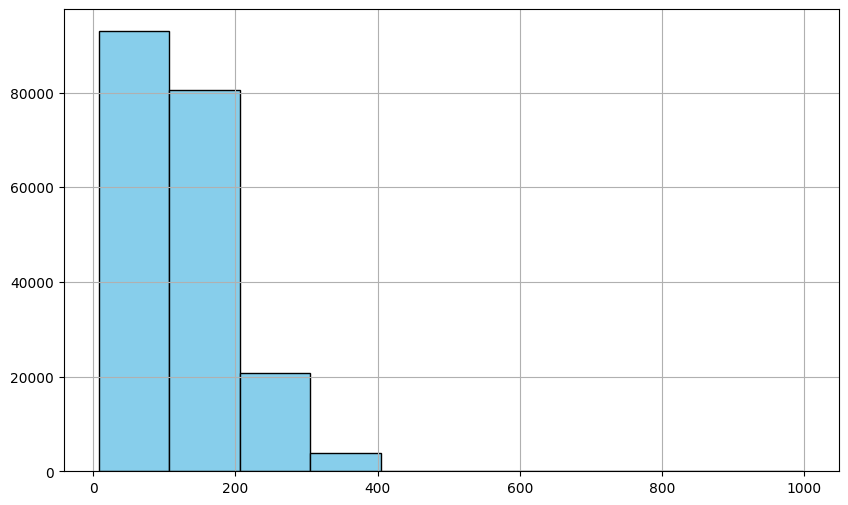

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train["중성지방"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

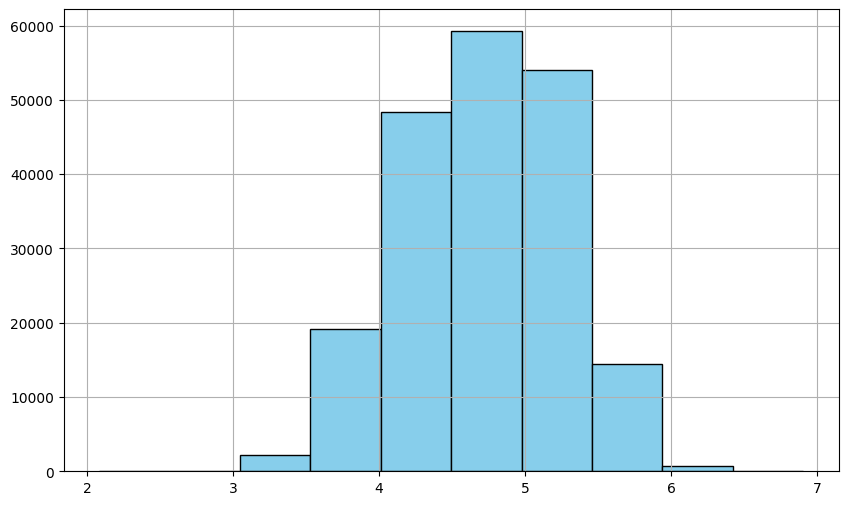

In [ ]:
train["중성지방"] = np.log(train["중성지방"])

plt.figure(figsize=(10, 6))
plt.hist(train["중성지방"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

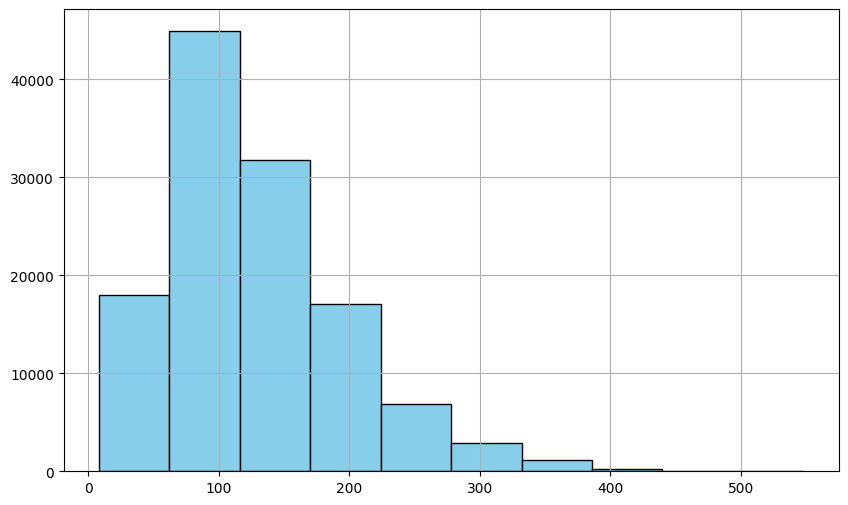

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(test["중성지방"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

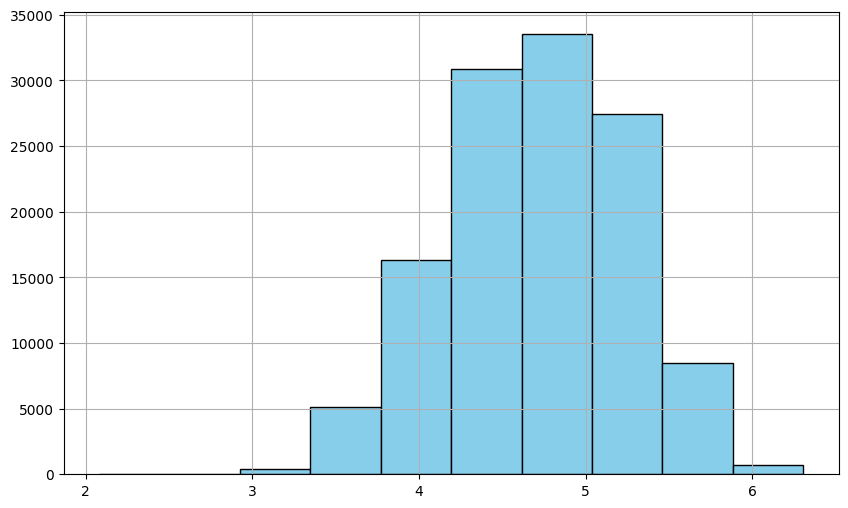

In [ ]:
test["중성지방"] = np.log(test["중성지방"])

plt.figure(figsize=(10, 6))
plt.hist(test["중성지방"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

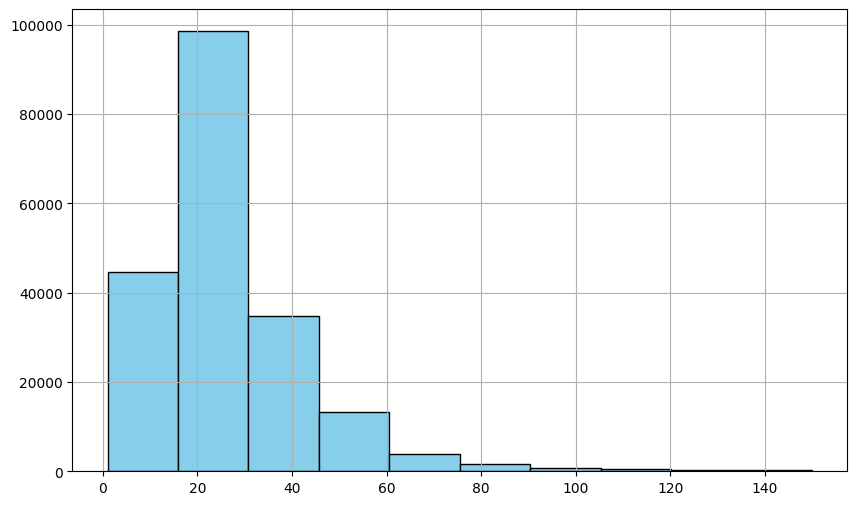

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train["간세포 손상 수치 ALT"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

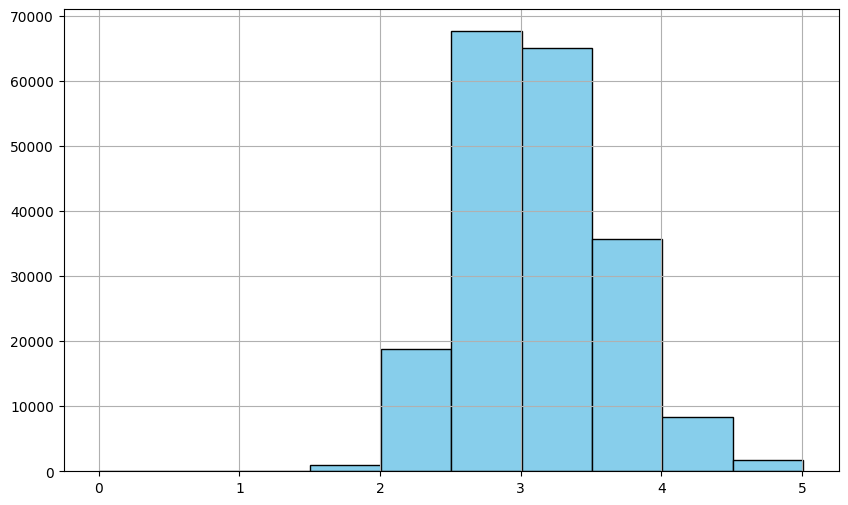

In [ ]:
train["간세포 손상 수치 ALT"] = np.log(train["간세포 손상 수치 ALT"])

plt.figure(figsize=(10, 6))
plt.hist(train["간세포 손상 수치 ALT"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

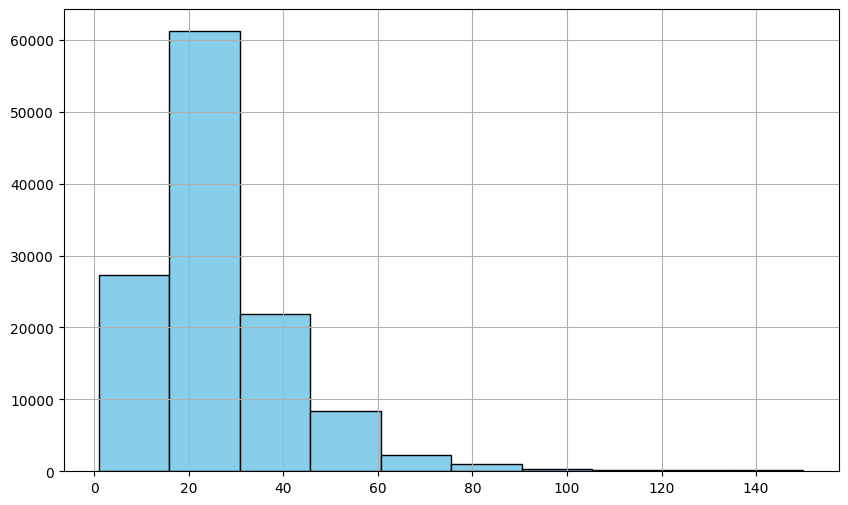

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(test["간세포 손상 수치 ALT"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

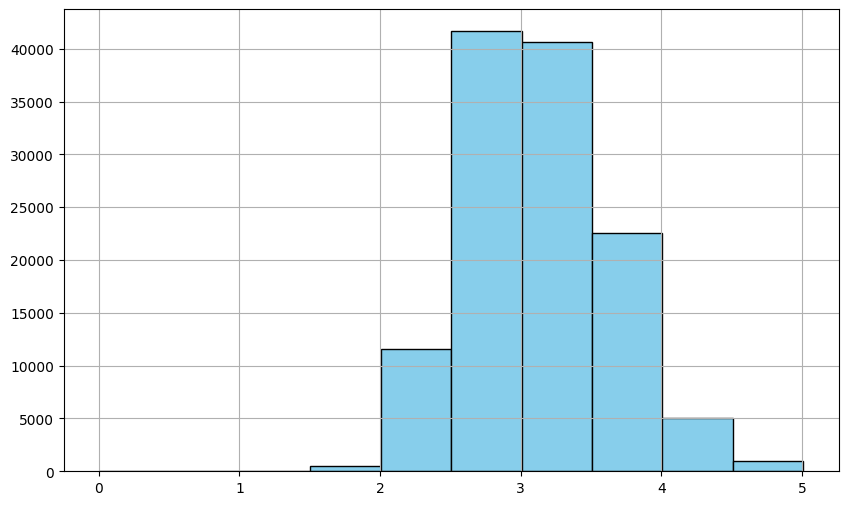

In [ ]:
test["간세포 손상 수치 ALT"] = np.log(test["간세포 손상 수치 ALT"])

plt.figure(figsize=(10, 6))
plt.hist(test["간세포 손상 수치 ALT"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

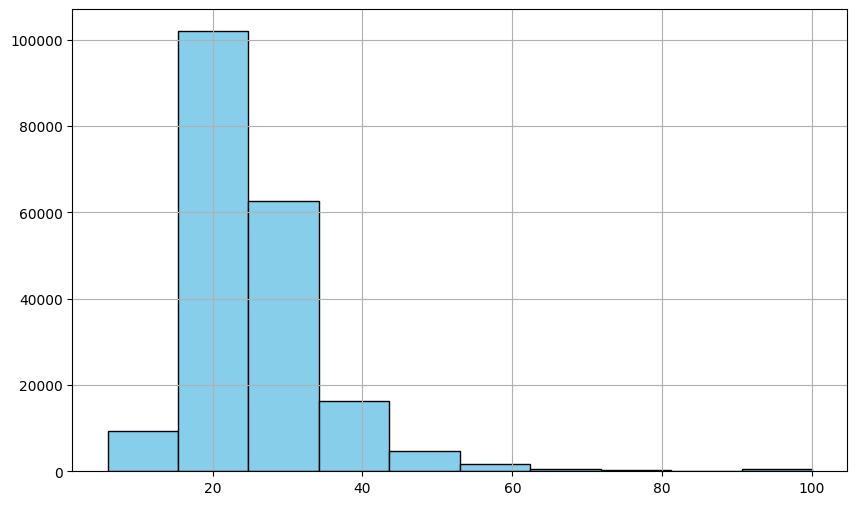

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train["간세포 손상 수치 AST"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

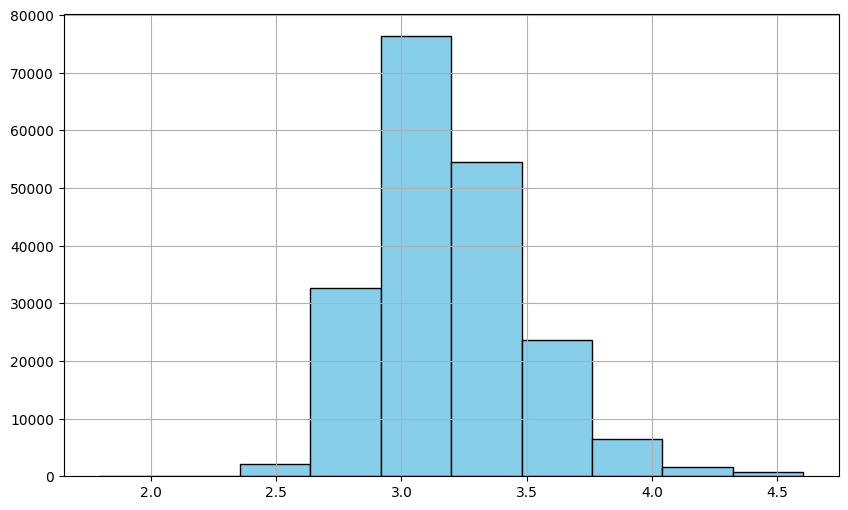

In [ ]:
train["간세포 손상 수치 AST"] = np.log(train["간세포 손상 수치 AST"])

plt.figure(figsize=(10, 6))
plt.hist(train["간세포 손상 수치 AST"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

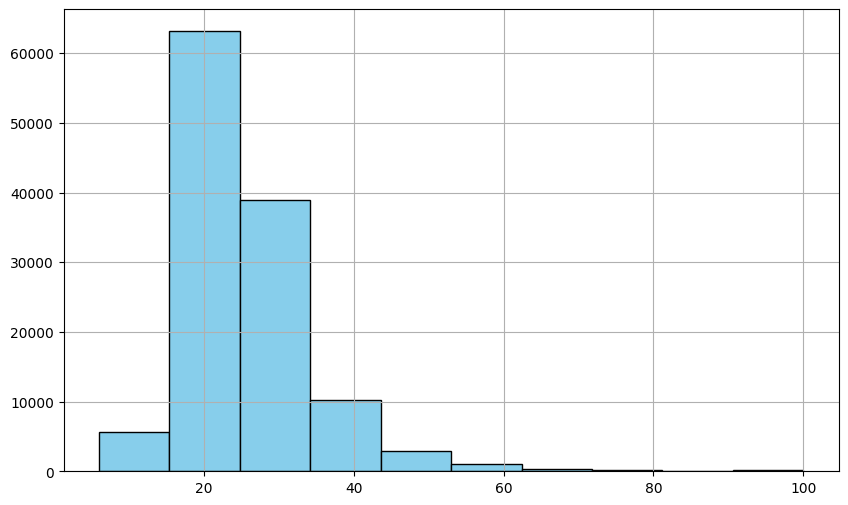

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(test["간세포 손상 수치 AST"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

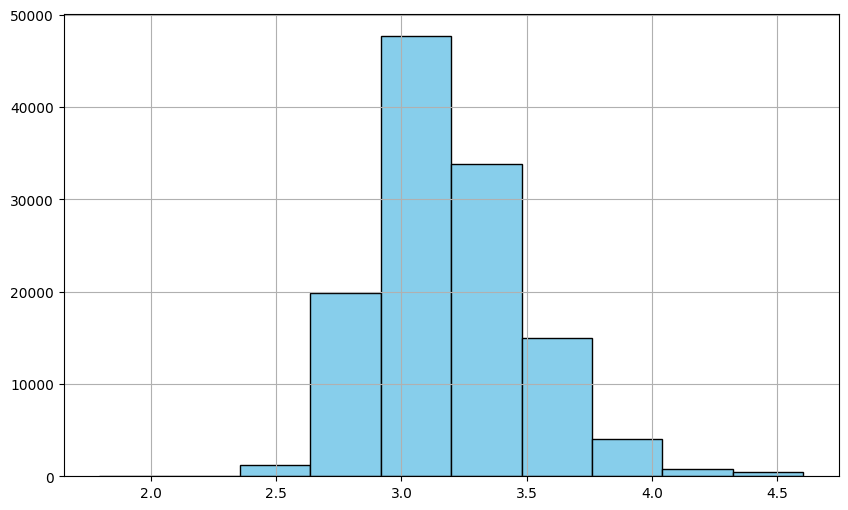

In [ ]:
test["간세포 손상 수치 AST"] = np.log(test["간세포 손상 수치 AST"])

plt.figure(figsize=(10, 6))
plt.hist(test["간세포 손상 수치 AST"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

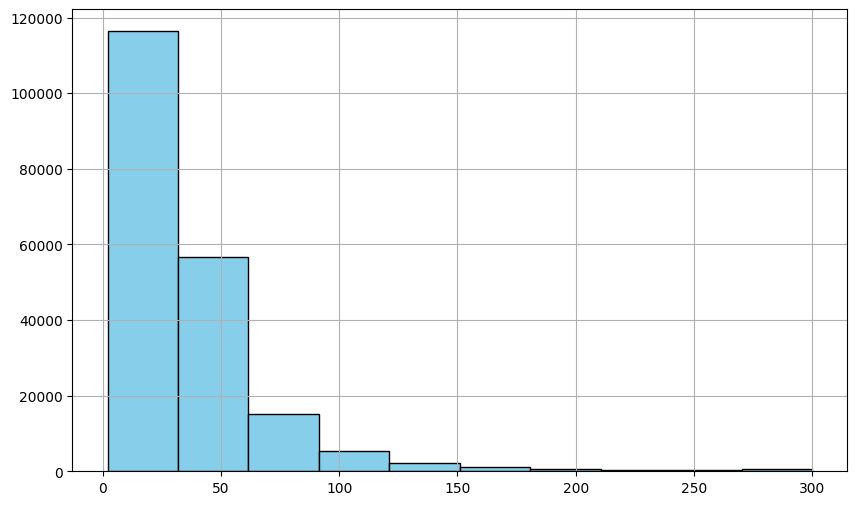

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train["감마 Gtp(간효소)"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

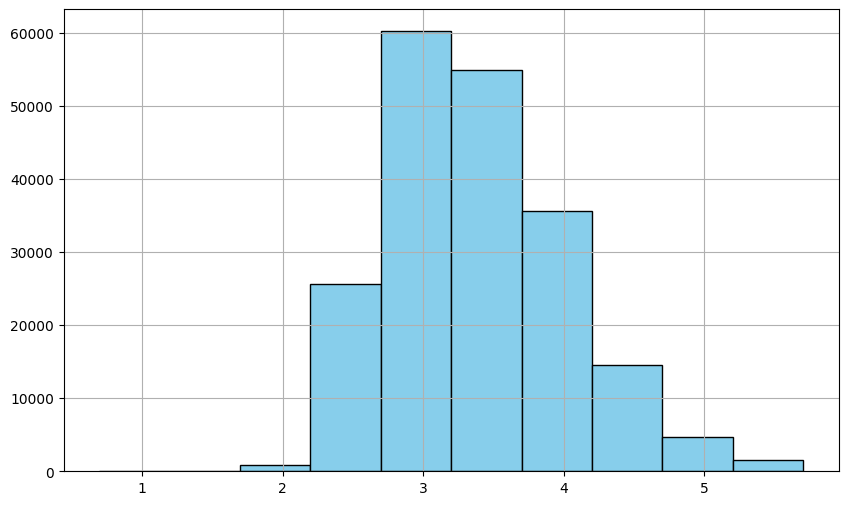

In [ ]:
train["감마 Gtp(간효소)"] = np.log(train["감마 Gtp(간효소)"])

plt.figure(figsize=(10, 6))
plt.hist(train["감마 Gtp(간효소)"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

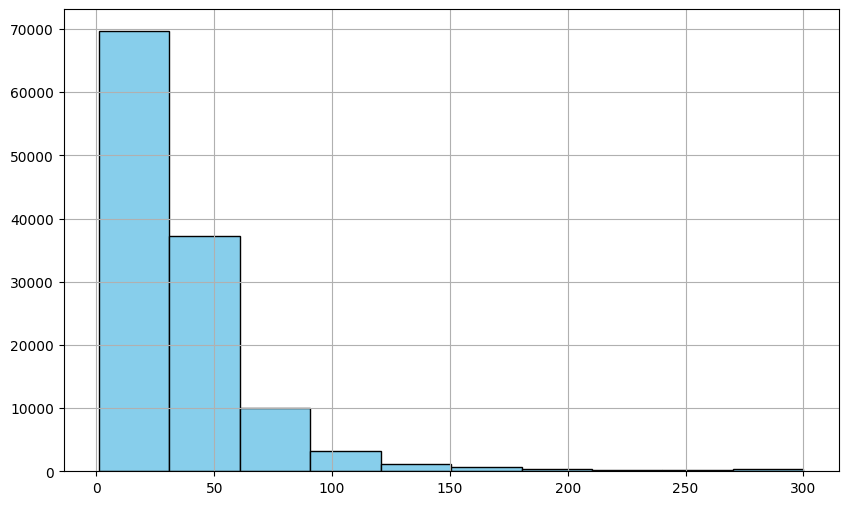

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(test["감마 Gtp(간효소)"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

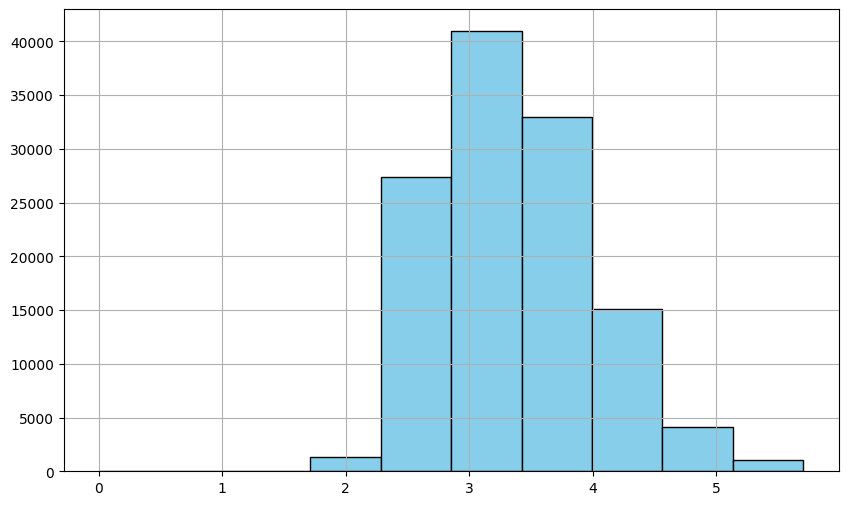

In [ ]:
test["감마 Gtp(간효소)"] = np.log(test["감마 Gtp(간효소)"])

plt.figure(figsize=(10, 6))
plt.hist(test["감마 Gtp(간효소)"], bins=10, color='skyblue', edgecolor='black')
plt.grid(True)
plt.show()

/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYL

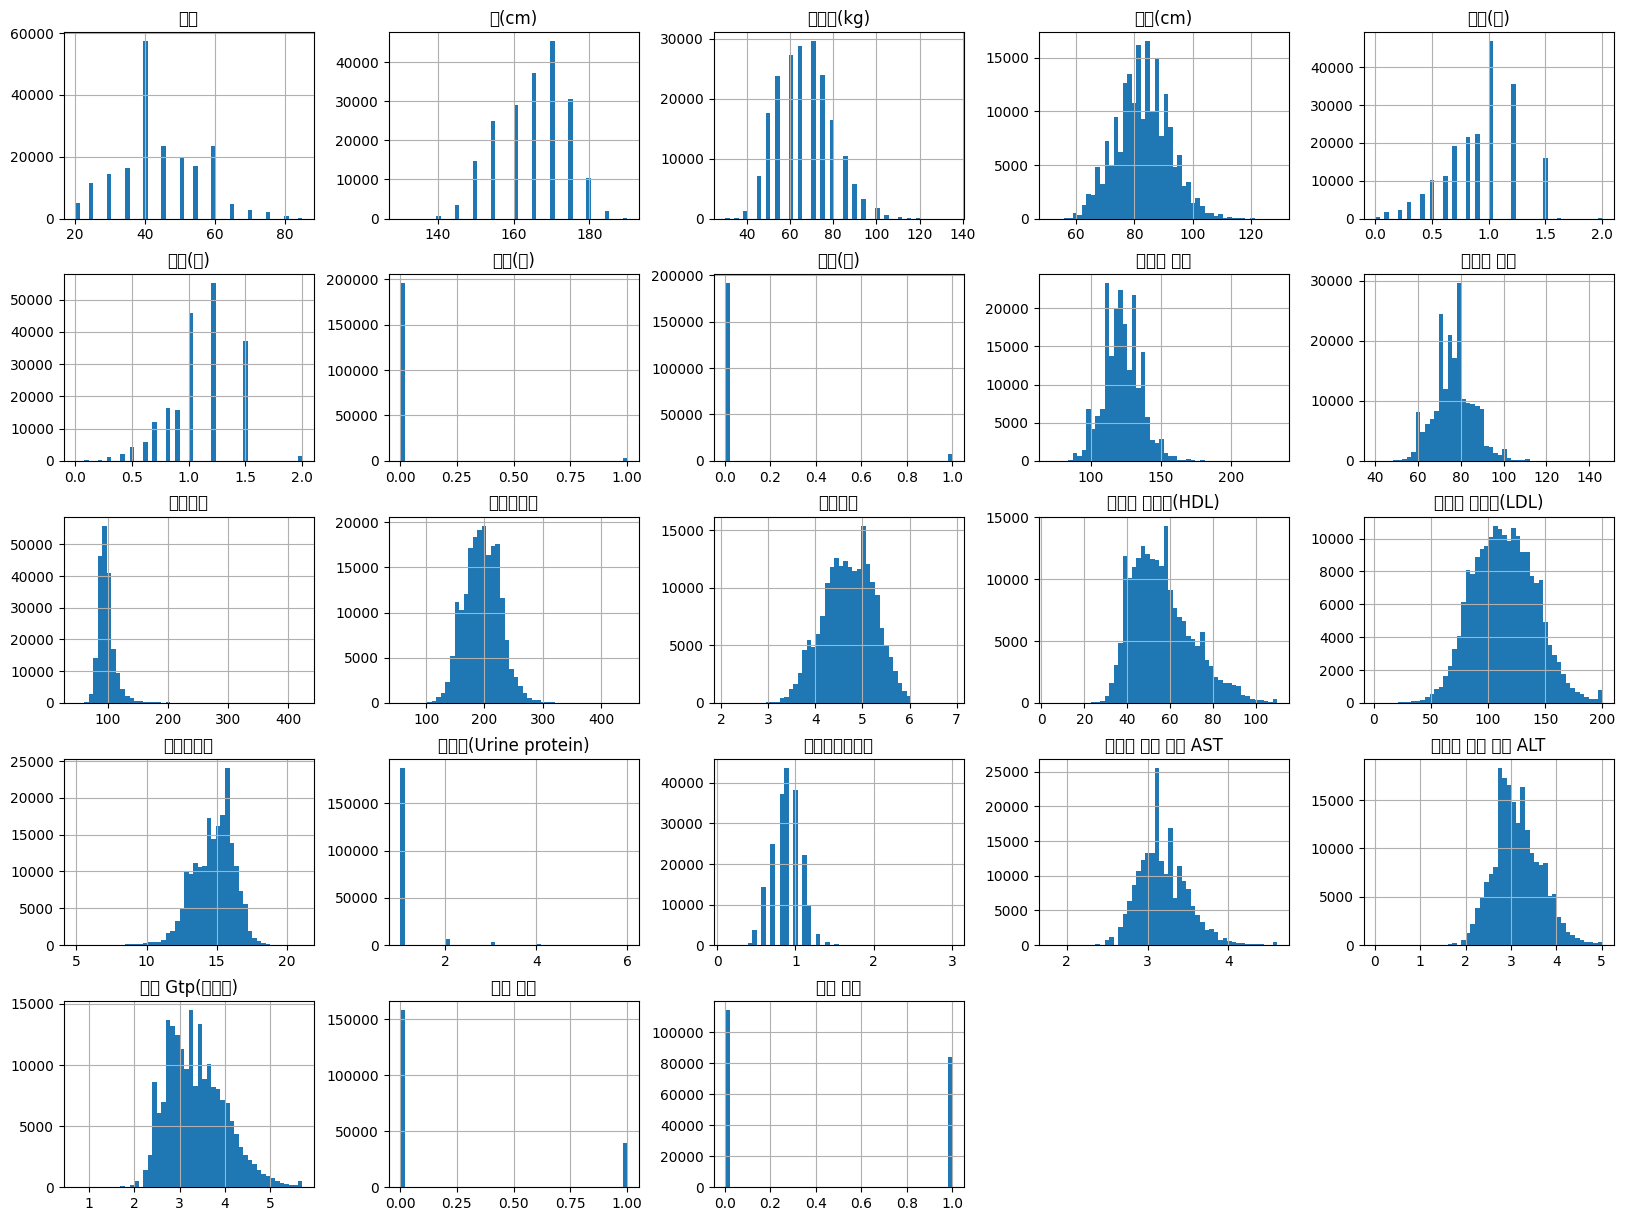

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

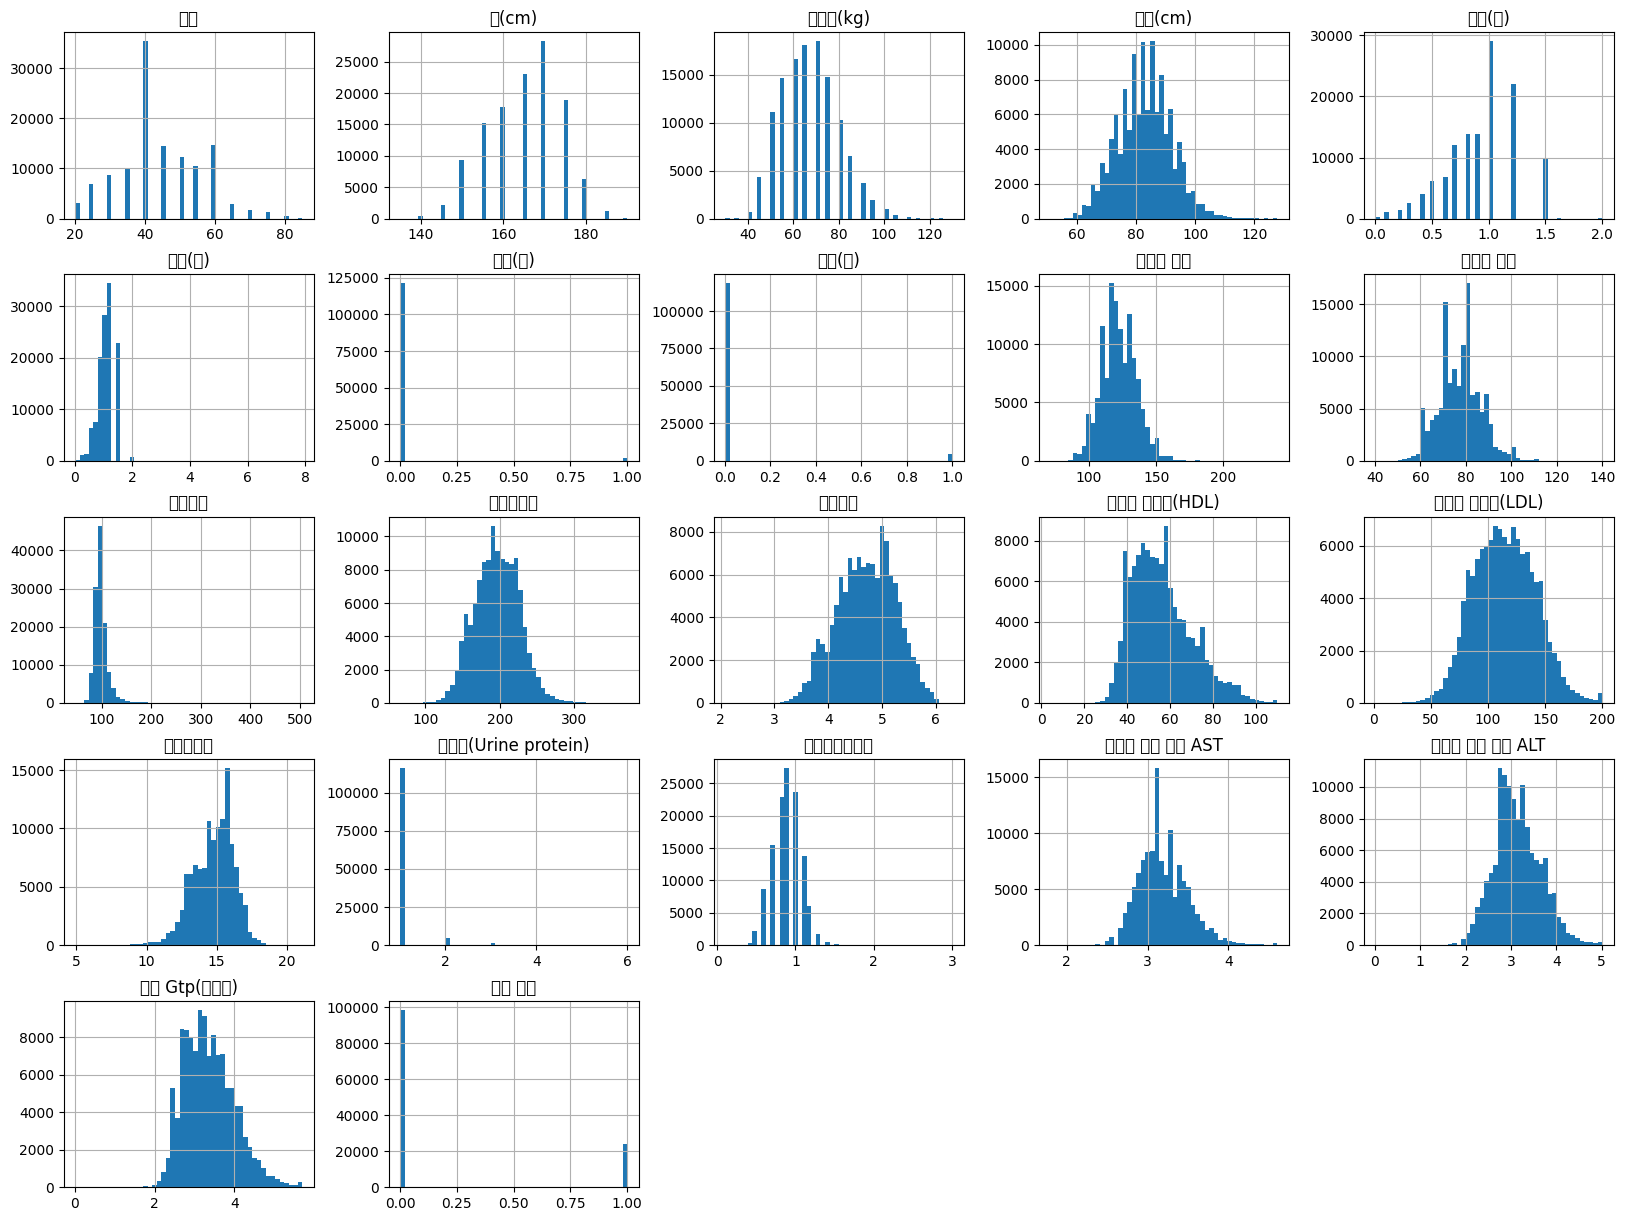

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
test.hist(bins=50, figsize=(20,15))
plt.show()

/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  plt.tight_layout()
/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from current font.
  plt.tight_layout()
/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.tight_layout()
/var/folders/fw/v4x3fkk94qvbl08b9n5jw7w40000gn/T/ipykernel_26541/3099241048.py:11: UserWarn

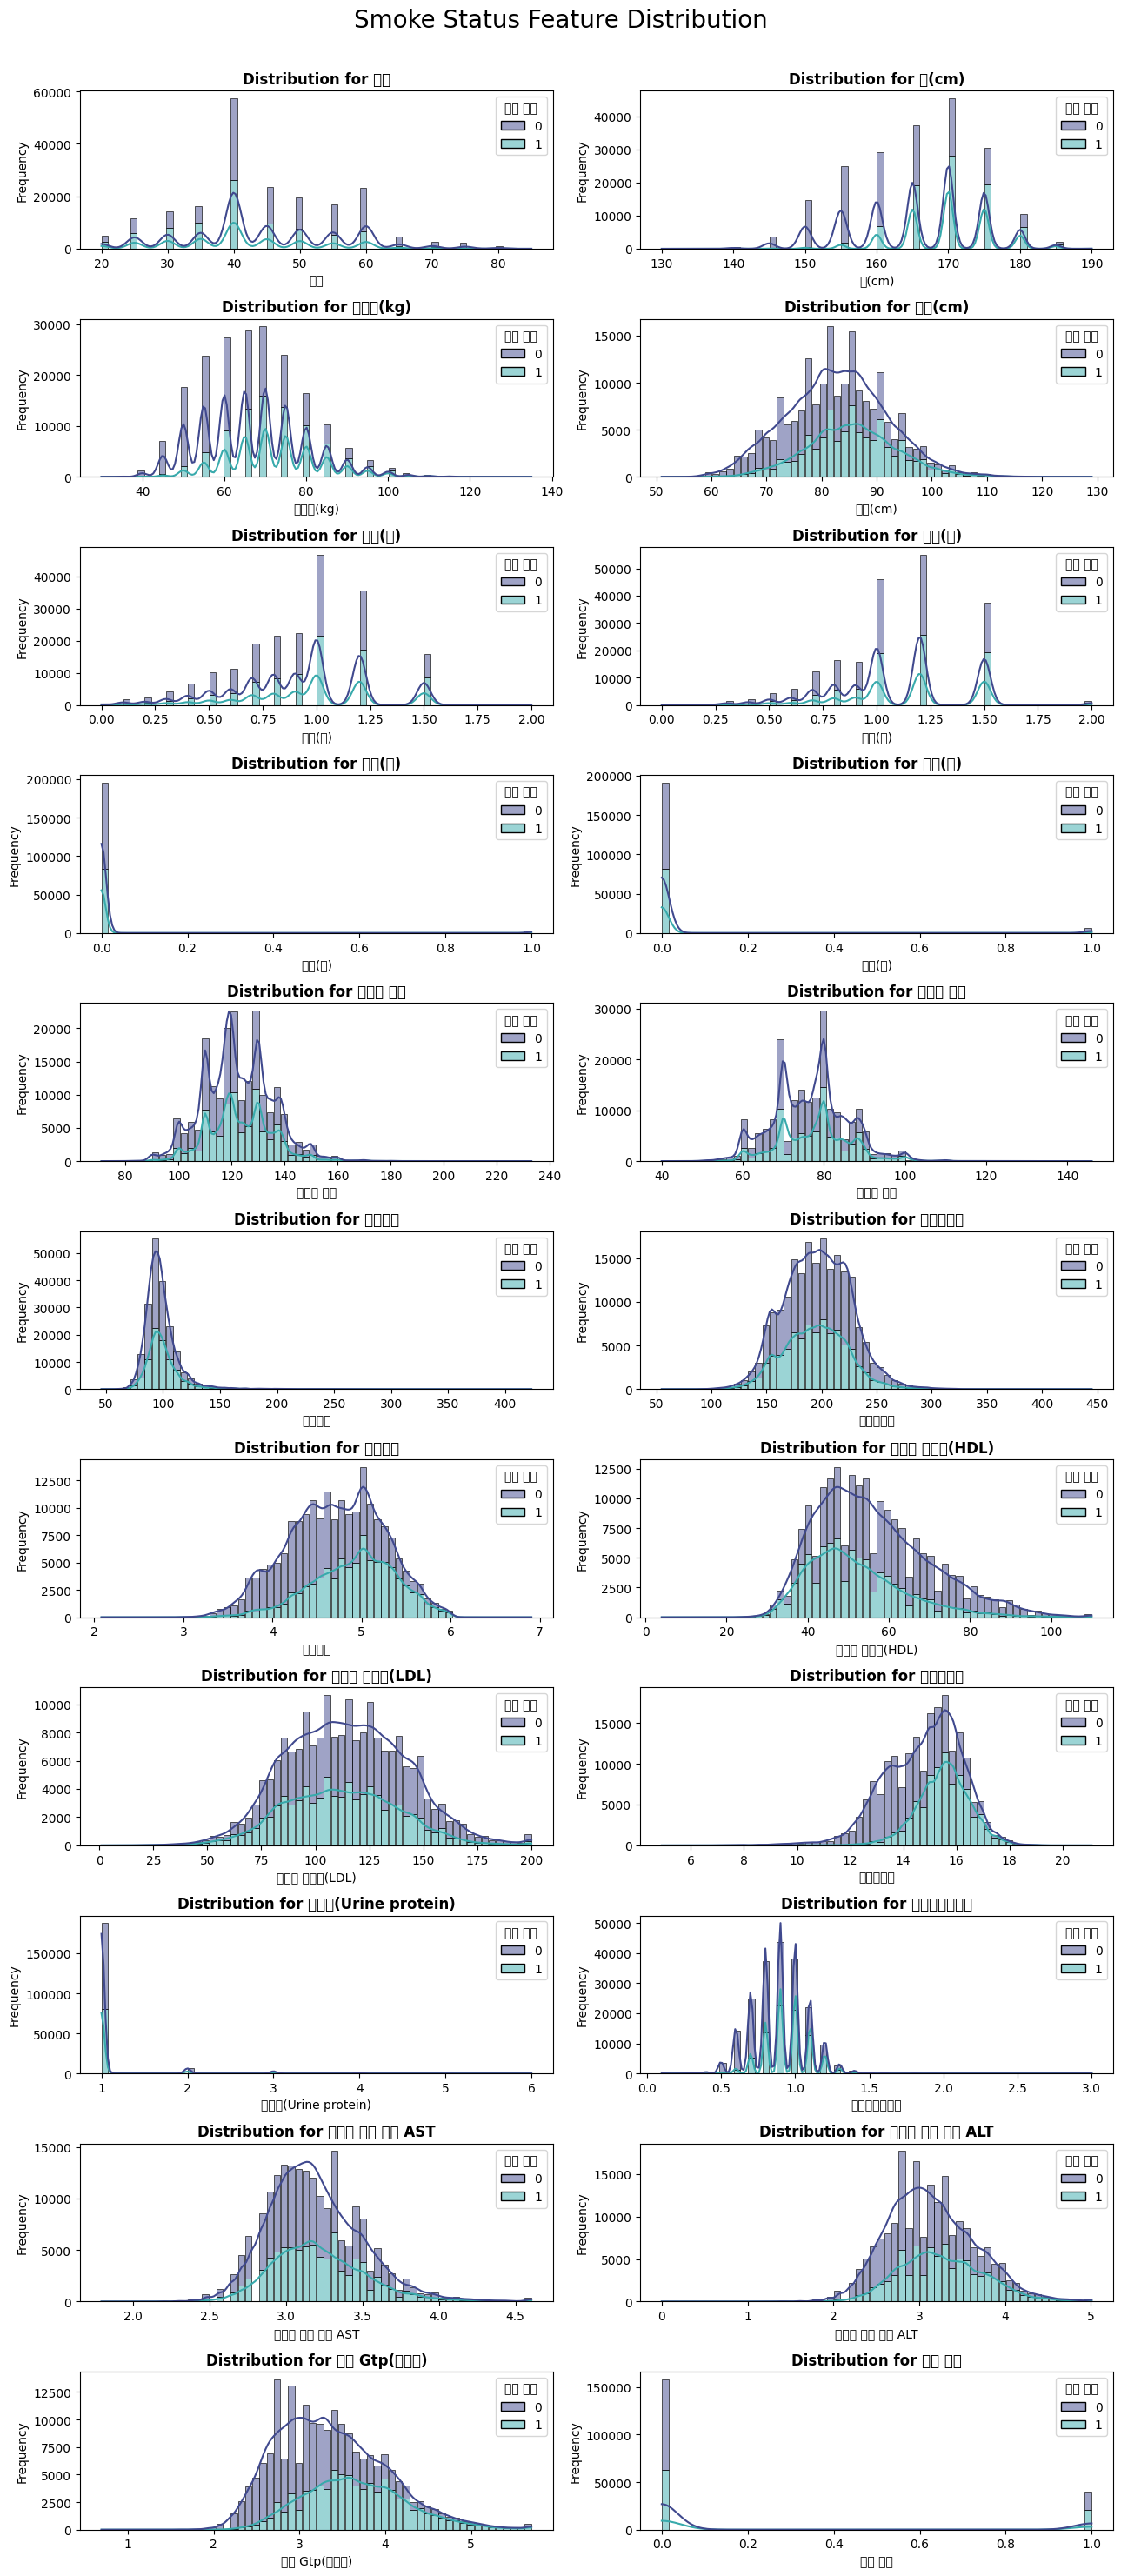

In [ ]:
#이상치 확인/ 요인별 smoking 여부에 따른 분포 차이

figure, axs = plt.subplots(11, 2, figsize=(13,29))

for col, ax in zip(train.columns, axs.ravel()):
        sns.histplot(data=train, x=col, hue='흡연 여부', palette="mako", multiple="stack", kde=True, bins=60, shrink=0.9, ax=ax)
        ax.set_title(f'Distribution for {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.suptitle("Smoke Status Feature Distribution", y=1.02, fontsize=20)
plt.show()

### 파생 변수 추가

#### BMI = weight/ (height / 100) ^ 2

In [ ]:
train['BMI'] = train['몸무게(kg)'] / (train['키(cm)']/100) ** 2
train['BMI']

0         22.038567
1         23.875115
2         25.951557
3         29.320988
4         22.038567
            ...    
198235    22.038567
198236    22.892820
198237    36.332180
198238    21.484375
198239    19.591837
Name: BMI, Length: 198240, dtype: float64

In [ ]:
test['BMI'] = test['몸무게(kg)'] / (test['키(cm)']/100) ** 2
test['BMI']

0         25.711662
1         23.437500
2         24.221453
3         19.531250
4         25.951557
            ...    
122874    23.875115
122875    29.136316
122876    20.811655
122877    25.711662
122878    24.691358
Name: BMI, Length: 122879, dtype: float64

#### 맥압 = 수축기 혈압 - 이완기 혈압

In [ ]:
train['맥압'] = train['수축기 혈압'] - train['이완기 혈압']
train['맥압']

0         48
1         63
2         43
3         43
4         45
          ..
198235    47
198236    54
198237    56
198238    26
198239    48
Name: 맥압, Length: 198240, dtype: int64

In [ ]:
test['맥압'] = test['수축기 혈압'] - test['이완기 혈압']
test['맥압']

0         41
1         72
2         42
3         54
4         38
          ..
122874    33
122875    64
122876    54
122877    46
122878    40
Name: 맥압, Length: 122879, dtype: int64

#### 평균 시력 = 시력(좌)와 시력(우)의 평균

In [ ]:
train['평균 시력'] = (train['시력(좌)'] + train['시력(우)']) / 2
train['평균 시력']

0         0.55
1         0.65
2         0.45
3         1.35
4         1.25
          ... 
198235    0.50
198236    1.35
198237    0.55
198238    1.50
198239    1.00
Name: 평균 시력, Length: 198240, dtype: float64

In [ ]:
test['평균 시력'] = (test['시력(좌)'] + test['시력(우)']) / 2
test['평균 시력']

0         1.20
1         1.00
2         0.65
3         0.35
4         0.95
          ... 
122874    0.85
122875    0.90
122876    0.85
122877    1.00
122878    1.05
Name: 평균 시력, Length: 122879, dtype: float64

#### 평균 청력 = 청력(좌)와 청력(우)의 평균

In [ ]:
train['평균 청력'] = (train['청력(좌)'] + train['청력(우)']) / 2
train['평균 청력']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
198235    0.0
198236    0.0
198237    0.0
198238    0.0
198239    0.0
Name: 평균 청력, Length: 198240, dtype: float64

In [ ]:
test['평균 청력'] = (test['청력(좌)'] + test['청력(우)']) / 2
test['평균 청력']

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
122874    0.0
122875    0.0
122876    0.0
122877    0.0
122878    0.0
Name: 평균 청력, Length: 122879, dtype: float64

#### 키 대 허리둘레 비율 = 키(cm) / 허리(cm)

In [ ]:
train['키 대 허리둘레 비율'] = train['키(cm)'] / train['허리(cm)']
train['키 대 허리둘레 비율']

0         2.037037
1         1.853933
2         2.098765
3         1.714286
4         2.049689
            ...   
198235    2.062500
198236    2.066667
198237    1.370968
198238    2.133333
198239    2.157830
Name: 키 대 허리둘레 비율, Length: 198240, dtype: float64

In [ ]:
test['키 대 허리둘레 비율'] = test['키(cm)'] / test['허리(cm)']
test['키 대 허리둘레 비율']

0         1.964286
1         1.720430
2         1.965318
3         2.388060
4         1.901566
            ...   
122874    2.012195
122875    1.666667
122876    2.306548
122877    2.168200
122878    2.068966
Name: 키 대 허리둘레 비율, Length: 122879, dtype: float64

#### 키 대 나이 비율 = 키(cm) / 나이

In [ ]:
train['키 대 나이 비율'] = train['키(cm)'] / train['나이']
train['키 대 나이 비율']

0         3.000000
1         2.357143
2         8.500000
3         5.142857
4         5.500000
            ...   
198235    4.125000
198236    3.444444
198237    4.250000
198238    4.000000
198239    3.181818
Name: 키 대 나이 비율, Length: 198240, dtype: float64

In [ ]:
test['키 대 나이 비율'] = test['키(cm)'] / test['나이']
test['키 대 나이 비율']

0         4.125000
1         2.000000
2         2.833333
3         4.000000
4         4.250000
            ...   
122874    2.750000
122875    2.583333
122876    3.875000
122877    4.714286
122878    7.200000
Name: 키 대 나이 비율, Length: 122879, dtype: float64

#### 연령대별 헤모글로빈 수준 = 헤모글로빈 * (정규화된 나이 = 나이 / 최대 나이)

In [ ]:
max_age = train['나이'].max()

train['연령대별 헤모글로빈 수준'] = train['헤모글로빈'] * (train['나이'] / max_age)
train['연령대별 헤모글로빈 수준']

0         10.676471
1         13.341176
2          4.094118
3          6.547059
4          5.435294
            ...    
198235     5.788235
198236     6.617647
198237     8.047059
198238     5.647059
198239     8.994118
Name: 연령대별 헤모글로빈 수준, Length: 198240, dtype: float64

In [ ]:
max_age = test['나이'].max()

test['연령대별 헤모글로빈 수준'] = test['헤모글로빈'] * (test['나이'] / max_age)
test['연령대별 헤모글로빈 수준']

0          6.682353
1         12.235294
2         10.870588
3          6.823529
4          7.764706
            ...    
122874     9.529412
122875     9.811765
122876     6.305882
122877     5.888235
122878     4.676471
Name: 연령대별 헤모글로빈 수준, Length: 122879, dtype: float64

#### 수축기 혈압 연령 비율 = 개인별 수축기 혈압 지수 / 연령대별 평균 수축기 혈압

In [ ]:
quantile_bins = pd.qcut(train['나이'], q=5, labels=False, precision=0)
grouped_systolic = train.groupby(quantile_bins)['수축기 혈압'].transform('mean')

train['수축기 혈압 연령 비율'] = train['수축기 혈압'] / grouped_systolic
train['수축기 혈압 연령 비율']

0         1.099694
1         1.148136
2         0.968713
3         1.075435
4         0.993341
            ...   
198235    0.892460
198236    1.037382
198237    1.176046
198238    0.792371
198239    0.928631
Name: 수축기 혈압 연령 비율, Length: 198240, dtype: float64

In [ ]:
quantile_bins = pd.qcut(test['나이'], q=5, labels=False, precision=0)
grouped_systolic = train.groupby(quantile_bins)['수축기 혈압'].transform('mean')

test['수축기 혈압 연령 비율'] = test['수축기 혈압'] / grouped_systolic
test['수축기 혈압 연령 비율']

0         1.061793
1         1.173826
2         0.953734
3         0.947446
4         1.078128
            ...   
122874    0.823309
122875    1.092311
122876    1.094463
122877    0.931343
122878    0.898664
Name: 수축기 혈압 연령 비율, Length: 122879, dtype: float64

#### 나이와 콜레스테롤 상관관계 = (콜레스테롤 * 나이) / 100

In [ ]:
train['나이와 콜레스테롤 상관관계'] = train['콜레스테롤'] * train['나이'] / 100
train['나이와 콜레스테롤 상관관계']

0          94.60
1         135.80
2          35.60
3          63.00
4          46.50
           ...  
198235     57.60
198236    102.15
198237     90.00
198238     82.40
198239    116.60
Name: 나이와 콜레스테롤 상관관계, Length: 198240, dtype: float64

In [ ]:
test['나이와 콜레스테롤 상관관계'] = test['콜레스테롤'] * test['나이'] / 100
test['나이와 콜레스테롤 상관관계']

0          80.00
1         137.60
2          96.60
3          85.20
4          68.00
           ...  
122874    106.20
122875     99.00
122876     82.40
122877     70.35
122878     40.25
Name: 나이와 콜레스테롤 상관관계, Length: 122879, dtype: float64

#### 수축기 혈압과 BMI의 비율 = 수축기 혈압 / BMI

In [ ]:
train['수축기 혈압과 BMI의 비율'] = train['수축기 혈압'] / train['BMI']
train['수축기 혈압과 BMI의 비율']

0         6.125625
1         6.115154
2         4.546933
3         4.467789
4         5.490375
            ...   
198235    4.855125
198236    5.503909
198237    3.880857
198238    4.421818
198239    5.818750
Name: 수축기 혈압과 BMI의 비율, Length: 198240, dtype: float64

In [ ]:
test['수축기 혈압과 BMI의 비율'] = test['수축기 혈압'] / test['BMI']
test['수축기 혈압과 BMI의 비율']

0         5.056071
1         6.144000
2         4.830429
3         5.939200
4         5.086400
            ...   
122874    4.230346
122875    4.599071
122876    6.438700
122877    4.433786
122878    4.455000
Name: 수축기 혈압과 BMI의 비율, Length: 122879, dtype: float64

### Correlation

In [ ]:
correlation = train.corr()['흡연 여부'].sort_values(ascending=False)

print(correlation)

흡연 여부                 1.000000
헤모글로빈                 0.441413
키(cm)                 0.437073
감마 Gtp(간효소)           0.398811
몸무게(kg)               0.342749
중성지방                  0.329193
혈청크레아티닌               0.270257
허리(cm)                0.256513
키 대 나이 비율             0.217812
간세포 손상 수치 ALT         0.217762
평균 시력                 0.143113
시력(우)                 0.138624
BMI                   0.136002
시력(좌)                 0.135177
이완기 혈압                0.110132
충치 여부                 0.105695
공복혈당                  0.094883
수축기 혈압 연령 비율          0.093152
간세포 손상 수치 AST         0.079060
수축기 혈압                0.062593
요단백(Urine protein)   -0.020131
맥압                   -0.023221
청력(좌)                -0.030619
연령대별 헤모글로빈 수준        -0.032320
청력(우)                -0.038353
평균 청력                -0.039125
콜레스테롤                -0.046617
키 대 허리둘레 비율          -0.054162
저밀도 지단백(LDL)         -0.071542
수축기 혈압과 BMI의 비율      -0.081447
나이와 콜레스테롤 상관관계       -0.194860
나이                   -0.197586
고밀도 지단백(

### train 데이터 프레임 분석

In [ ]:
def analyze_dataframe(df):
    print("DataFrame Information:")
    print("----------------------")
    display(df.info(verbose=True, show_counts=True))
    print("\n")

    print("DataFrame Values:")
    print("----------------------")
    display(df.head(5).T)
    print("\n")

    print("DataFrame Description:")
    print("----------------------")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("----------------------")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("--------------------------")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("------------------------")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("----------------")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Usage
analyze_dataframe(train)

DataFrame Information:
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   나이                  198240 non-null  int64  
 1   키(cm)               198240 non-null  int64  
 2   몸무게(kg)             198240 non-null  int64  
 3   허리(cm)              198240 non-null  float64
 4   시력(좌)               198240 non-null  float64
 5   시력(우)               198240 non-null  float64
 6   청력(좌)               198240 non-null  int64  
 7   청력(우)               198240 non-null  int64  
 8   수축기 혈압              198240 non-null  int64  
 9   이완기 혈압              198240 non-null  int64  
 10  공복혈당                198240 non-null  int64  
 11  콜레스테롤               198240 non-null  int64  
 12  중성지방                198240 non-null  float64
 13  고밀도 지단백(HDL)        198240 non-null  int64  
 14  저밀도 지단백(LDL)        198240 non-null  i

None



DataFrame Values:
----------------------


,0,1,2,3,4
나이,55.000000,70.000000,20.000000,35.000000,30.000000
키(cm),165.000000,165.000000,170.000000,180.000000,165.000000
몸무게(kg),60.000000,65.000000,75.000000,95.000000,60.000000
허리(cm),81.000000,89.000000,81.000000,105.000000,80.500000
시력(좌),0.500000,0.600000,0.400000,1.200000,1.000000
시력(우),0.600000,0.700000,0.500000,1.500000,1.500000
청력(좌),0.000000,1.000000,0.000000,0.000000,0.000000
청력(우),0.000000,1.000000,0.000000,0.000000,0.000000
수축기 혈압,135.000000,146.000000,118.000000,131.000000,121.000000
이완기 혈압,87.000000,83.000000,75.000000,88.000000,76.000000




DataFrame Description:
----------------------


,count,mean,std,min,25%,50%,75%,max
나이,198240.0,44.271418,11.886308,20.000000,40.000000,40.000000,55.000000,85.000000
키(cm),198240.0,165.153375,8.895587,130.000000,160.000000,165.000000,170.000000,190.000000
몸무게(kg),198240.0,66.906709,12.656868,30.000000,55.000000,65.000000,75.000000,135.000000
허리(cm),198240.0,82.817163,9.039363,51.000000,77.000000,83.000000,89.000000,129.000000
시력(좌),198240.0,0.913259,0.309760,0.000000,0.700000,0.900000,1.200000,2.000000
시력(우),198240.0,1.077532,0.297112,0.000000,0.900000,1.000000,1.200000,2.000000
청력(좌),198240.0,0.013423,0.115078,0.000000,0.000000,0.000000,0.000000,1.000000
청력(우),198240.0,0.034791,0.183251,0.000000,0.000000,0.000000,0.000000,1.000000
수축기 혈압,198240.0,122.301488,12.920634,71.000000,113.000000,121.000000,130.000000,233.000000
이완기 혈압,198240.0,76.701085,9.135720,40.000000,70.000000,77.000000,82.000000,146.000000




Number of Null Values:
----------------------


나이                    0
키(cm)                 0
몸무게(kg)               0
허리(cm)                0
시력(좌)                 0
시력(우)                 0
청력(좌)                 0
청력(우)                 0
수축기 혈압                0
이완기 혈압                0
공복혈당                  0
콜레스테롤                 0
중성지방                  0
고밀도 지단백(HDL)          0
저밀도 지단백(LDL)          0
헤모글로빈                 0
요단백(Urine protein)    0
혈청크레아티닌               0
간세포 손상 수치 AST         0
간세포 손상 수치 ALT         0
감마 Gtp(간효소)           0
충치 여부                 0
흡연 여부                 0
BMI                   0
맥압                    0
평균 시력                 0
평균 청력                 0
키 대 허리둘레 비율           0
키 대 나이 비율             0
연령대별 헤모글로빈 수준         0
수축기 혈압 연령 비율          0
나이와 콜레스테롤 상관관계        0
수축기 혈압과 BMI의 비율       0
dtype: int64



Number of Duplicated Rows:
--------------------------


5521



Number of Unique Values:
------------------------


나이                      18
키(cm)                   15
몸무게(kg)                 29
허리(cm)                 548
시력(좌)                   17
시력(우)                   21
청력(좌)                    2
청력(우)                    2
수축기 혈압                 128
이완기 혈압                  94
공복혈당                   259
콜레스테롤                  279
중성지방                   393
고밀도 지단백(HDL)            93
저밀도 지단백(LDL)           193
헤모글로빈                  144
요단백(Urine protein)       6
혈청크레아티닌                 25
간세포 손상 수치 AST           95
간세포 손상 수치 ALT          150
감마 Gtp(간효소)            290
충치 여부                    2
흡연 여부                    2
BMI                    173
맥압                     103
평균 시력                   47
평균 청력                    3
키 대 허리둘레 비율           3221
키 대 나이 비율              133
연령대별 헤모글로빈 수준          981
수축기 혈압 연령 비율           513
나이와 콜레스테롤 상관관계        1616
수축기 혈압과 BMI의 비율       5442
dtype: int64



DataFrame Shape:
----------------
Rows: 198240, Columns: 33


### (원본 데이터와 합치며 발생한) 중복 값 제거

In [ ]:
import pandas as pd

def remove_duplicates(df):
    # Identify duplicates
    duplicates = df[df.duplicated()]

    # Print number of duplicates found and removed
    print(f"Number of duplicates found and removed: {len(duplicates)}")

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    return df_no_duplicates

train = remove_duplicates(train)

Number of duplicates found and removed: 5521


In [ ]:
import pandas as pd

def remove_duplicates(df):
    # Identify duplicates
    duplicates = df[df.duplicated()]

    # Print number of duplicates found and removed
    print(f"Number of duplicates found and removed: {len(duplicates)}")

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    return df_no_duplicates

test = remove_duplicates(test)

Number of duplicates found and removed: 998


In [ ]:
train

,나이,키(cm),몸무게(kg),허리(cm),시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,BMI,맥압,평균 시력,평균 청력,키 대 허리둘레 비율,키 대 나이 비율,연령대별 헤모글로빈 수준,수축기 혈압 연령 비율,나이와 콜레스테롤 상관관계,수축기 혈압과 BMI의 비율
0,55,165,60,81.0,0.5,0.6,0,0,135,87,...,22.038567,48,0.55,0.0,2.037037,3.000000,10.676471,1.099694,94.60,6.125625
1,70,165,65,89.0,0.6,0.7,1,1,146,83,...,23.875115,63,0.65,1.0,1.853933,2.357143,13.341176,1.148136,135.80,6.115154
2,20,170,75,81.0,0.4,0.5,0,0,118,75,...,25.951557,43,0.45,0.0,2.098765,8.500000,4.094118,0.968713,35.60,4.546933
3,35,180,95,105.0,1.2,1.5,0,0,131,88,...,29.320988,43,1.35,0.0,1.714286,5.142857,6.547059,1.075435,63.00,4.467789
4,30,165,60,80.5,1.0,1.5,0,0,121,76,...,22.038567,45,1.25,0.0,2.049689,5.500000,5.435294,0.993341,46.50,5.490375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198234,40,170,65,77.0,1.5,1.5,0,0,110,62,...,22.491349,48,1.50,0.0,2.207792,4.250000,7.576471,0.917483,74.80,4.890769
198235,40,165,60,80.0,0.4,0.6,0,0,107,60,...,22.038567,47,0.50,0.0,2.062500,4.125000,5.788235,0.892460,57.60,4.855125
198236,45,155,55,75.0,1.2,1.5,0,0,126,72,...,22.892820,54,1.35,0.0,2.066667,3.444444,6.617647,1.037382,102.15,5.503909
198238,40,160,55,75.0,1.5,1.5,0,0,95,69,...,21.484375,26,1.50,0.0,2.133333,4.000000,5.647059,0.792371,82.40,4.421818


In [ ]:
test

,나이,키(cm),몸무게(kg),허리(cm),시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,...,BMI,맥압,평균 시력,평균 청력,키 대 허리둘레 비율,키 대 나이 비율,연령대별 헤모글로빈 수준,수축기 혈압 연령 비율,나이와 콜레스테롤 상관관계,수축기 혈압과 BMI의 비율
0,40,165,70,84.0,1.2,1.2,0,0,130,89,...,25.711662,41,1.20,0.0,1.964286,4.125000,6.682353,1.061793,80.00,5.056071
1,80,160,60,93.0,1.0,1.0,1,1,144,72,...,23.437500,72,1.00,1.0,1.720430,2.000000,12.235294,1.173826,137.60,6.144000
2,60,170,70,86.5,0.6,0.7,0,0,117,75,...,24.221453,42,0.65,0.0,1.965318,2.833333,10.870588,0.953734,96.60,4.830429
3,40,160,50,67.0,0.3,0.4,0,0,116,62,...,19.531250,54,0.35,0.0,2.388060,4.000000,6.823529,0.947446,85.20,5.939200
4,40,170,75,89.4,0.9,1.0,0,0,132,94,...,25.951557,38,0.95,0.0,1.901566,4.250000,7.764706,1.078128,68.00,5.086400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122874,60,165,65,82.0,0.7,1.0,0,0,101,68,...,23.875115,33,0.85,0.0,2.012195,2.750000,9.529412,0.823309,106.20,4.230346
122875,60,155,70,93.0,0.8,1.0,0,0,134,70,...,29.136316,64,0.90,0.0,1.666667,2.583333,9.811765,1.092311,99.00,4.599071
122876,40,155,50,67.2,0.8,0.9,0,0,134,80,...,20.811655,54,0.85,0.0,2.306548,3.875000,6.305882,1.094463,82.40,6.438700
122877,35,165,70,76.1,1.0,1.0,0,0,114,68,...,25.711662,46,1.00,0.0,2.168200,4.714286,5.888235,0.931343,70.35,4.433786


#### BMI 범주화

In [ ]:
# def categorize_bmi(bmi):
#     if bmi < 18.5:
#         return 'underweight'
#     elif 18.5 <= bmi < 23.0:
#         return 'normal'
#     elif 23.0 <= bmi < 25.0:
#         return 'overweight'
#     else:
#         return 'obesity'


# train['BMI category'] = train['BMI'].apply(categorize_bmi)
# test['BMI category'] = test['BMI'].apply(categorize_bmi)

# smoking_counts_BMI = train.groupby('BMI category')['흡연 여부'].sum()
# smoking_counts_BMI

In [ ]:
# smoking_counts_BMI.plot(kind='bar', color='skyblue')
# plt.xlabel('BMI category')
# plt.ylabel('Number of Smoker')
# plt.xticks(rotation=45)
# plt.show()

비만일 때 흡연자의 수가 가장 많음

#### 맥압 범주화

In [ ]:
# def categorize_pulse_pressure(pp):
#     if 34 <= pp <= 45:
#         return 'normal'
#     elif pp >= 60:
#         return 'crisis'
#     else:
#         return 'others'


# train['맥압 category'] = train['맥압'].apply(categorize_pulse_pressure)

# smoking_counts_PP = train.groupby('맥압 category')['흡연 여부'].sum()
# smoking_counts_PP

In [ ]:
# smoking_counts_PP.plot(kind='bar', color='skyblue')
# plt.xlabel('Purse Pressure')
# plt.ylabel('Number of Smoker')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# train

In [ ]:
# correlation = train.corr()['흡연 여부'].sort_values(ascending=False)

# print(correlation)

In [ ]:
train.columns

Index(['나이', '키(cm)', '몸무게(kg)', '허리(cm)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기 혈압', '이완기 혈압', '공복혈당', '콜레스테롤', '중성지방', '고밀도 지단백(HDL)',
       '저밀도 지단백(LDL)', '헤모글로빈', '요단백(Urine protein)', '혈청크레아티닌',
       '간세포 손상 수치 AST', '간세포 손상 수치 ALT', '감마 Gtp(간효소)', '충치 여부', '흡연 여부',
       'BMI', '맥압', '평균 시력', '평균 청력', '키 대 허리둘레 비율', '키 대 나이 비율',
       '연령대별 헤모글로빈 수준', '수축기 혈압 연령 비율', '나이와 콜레스테롤 상관관계', '수축기 혈압과 BMI의 비율'],
      dtype='object')

In [ ]:
col_list = ['age',
            'height(cm)',
            'weight(kg)',
            'waist(cm)',
            'eyesight(left)',
            'eyesight(right)',
            'hearing(left)',
            'hearing(right)',
            'systolic',
            'relaxation',
            'fasting blood sugar',
            'Cholesterol',
            'triglyceride',
            'HDL',
            'LDL',
            'hemoglobin',
            'Urine protein',
            'serum creatinine',
            'AST',
            'ALT',
            'Gtp',
            'dental caries',
            'smoking',
            'BMI',
            'blood pressure',
            'average_vision',
            'average_hearing',
            'ratio of height and waist',
            'ratio of height and age',
            'hemoglobin level by age group',
            'ratio of systolic and age',
            'intersection between age and Cholesterol',
            'ratio of systolic and BMI']

In [ ]:
train.columns = col_list

In [ ]:
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,BMI,blood pressure,average_vision,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI
0,55,165,60,81.0,0.5,0.6,0,0,135,87,...,22.038567,48,0.55,0.0,2.037037,3.000000,10.676471,1.099694,94.60,6.125625
1,70,165,65,89.0,0.6,0.7,1,1,146,83,...,23.875115,63,0.65,1.0,1.853933,2.357143,13.341176,1.148136,135.80,6.115154
2,20,170,75,81.0,0.4,0.5,0,0,118,75,...,25.951557,43,0.45,0.0,2.098765,8.500000,4.094118,0.968713,35.60,4.546933
3,35,180,95,105.0,1.2,1.5,0,0,131,88,...,29.320988,43,1.35,0.0,1.714286,5.142857,6.547059,1.075435,63.00,4.467789
4,30,165,60,80.5,1.0,1.5,0,0,121,76,...,22.038567,45,1.25,0.0,2.049689,5.500000,5.435294,0.993341,46.50,5.490375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198234,40,170,65,77.0,1.5,1.5,0,0,110,62,...,22.491349,48,1.50,0.0,2.207792,4.250000,7.576471,0.917483,74.80,4.890769
198235,40,165,60,80.0,0.4,0.6,0,0,107,60,...,22.038567,47,0.50,0.0,2.062500,4.125000,5.788235,0.892460,57.60,4.855125
198236,45,155,55,75.0,1.2,1.5,0,0,126,72,...,22.892820,54,1.35,0.0,2.066667,3.444444,6.617647,1.037382,102.15,5.503909
198238,40,160,55,75.0,1.5,1.5,0,0,95,69,...,21.484375,26,1.50,0.0,2.133333,4.000000,5.647059,0.792371,82.40,4.421818


In [ ]:
test.columns

Index(['나이', '키(cm)', '몸무게(kg)', '허리(cm)', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)',
       '수축기 혈압', '이완기 혈압', '공복혈당', '콜레스테롤', '중성지방', '고밀도 지단백(HDL)',
       '저밀도 지단백(LDL)', '헤모글로빈', '요단백(Urine protein)', '혈청크레아티닌',
       '간세포 손상 수치 AST', '간세포 손상 수치 ALT', '감마 Gtp(간효소)', '충치 여부', 'BMI', '맥압',
       '평균 시력', '평균 청력', '키 대 허리둘레 비율', '키 대 나이 비율', '연령대별 헤모글로빈 수준',
       '수축기 혈압 연령 비율', '나이와 콜레스테롤 상관관계', '수축기 혈압과 BMI의 비율'],
      dtype='object')

In [ ]:
col_list3 = ['age',
            'height(cm)',
            'weight(kg)',
            'waist(cm)',
            'eyesight(left)',
            'eyesight(right)',
            'hearing(left)',
            'hearing(right)',
            'systolic',
            'relaxation',
            'fasting blood sugar',
            'Cholesterol',
            'triglyceride',
            'HDL',
            'LDL',
            'hemoglobin',
            'Urine protein',
            'serum creatinine',
            'AST',
            'ALT',
            'Gtp',
            'dental caries',
            'BMI',
            'blood pressure',
            'average_vision',
            'average_hearing',
            'ratio of height and waist',
            'ratio of height and age',
            'hemoglobin level by age group',
            'ratio of systolic and age',
            'intersection between age and Cholesterol',
            'ratio of systolic and BMI']

In [ ]:
test.columns = col_list3

In [ ]:
test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,BMI,blood pressure,average_vision,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI
0,40,165,70,84.0,1.2,1.2,0,0,130,89,...,25.711662,41,1.20,0.0,1.964286,4.125000,6.682353,1.061793,80.00,5.056071
1,80,160,60,93.0,1.0,1.0,1,1,144,72,...,23.437500,72,1.00,1.0,1.720430,2.000000,12.235294,1.173826,137.60,6.144000
2,60,170,70,86.5,0.6,0.7,0,0,117,75,...,24.221453,42,0.65,0.0,1.965318,2.833333,10.870588,0.953734,96.60,4.830429
3,40,160,50,67.0,0.3,0.4,0,0,116,62,...,19.531250,54,0.35,0.0,2.388060,4.000000,6.823529,0.947446,85.20,5.939200
4,40,170,75,89.4,0.9,1.0,0,0,132,94,...,25.951557,38,0.95,0.0,1.901566,4.250000,7.764706,1.078128,68.00,5.086400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122874,60,165,65,82.0,0.7,1.0,0,0,101,68,...,23.875115,33,0.85,0.0,2.012195,2.750000,9.529412,0.823309,106.20,4.230346
122875,60,155,70,93.0,0.8,1.0,0,0,134,70,...,29.136316,64,0.90,0.0,1.666667,2.583333,9.811765,1.092311,99.00,4.599071
122876,40,155,50,67.2,0.8,0.9,0,0,134,80,...,20.811655,54,0.85,0.0,2.306548,3.875000,6.305882,1.094463,82.40,6.438700
122877,35,165,70,76.1,1.0,1.0,0,0,114,68,...,25.711662,46,1.00,0.0,2.168200,4.714286,5.888235,0.931343,70.35,4.433786


In [ ]:
#train.to_csv('train_eda.csv', index=False)

In [ ]:
#test.to_csv('test_eda.csv', index=False)

In [ ]:
X = train.drop("smoking", axis =1)
y = train["smoking"]
train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,BMI,blood pressure,average_vision,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI
0,55,165,60,81.0,0.5,0.6,0,0,135,87,...,22.038567,48,0.55,0.0,2.037037,3.000000,10.676471,1.099694,94.60,6.125625
1,70,165,65,89.0,0.6,0.7,1,1,146,83,...,23.875115,63,0.65,1.0,1.853933,2.357143,13.341176,1.148136,135.80,6.115154
2,20,170,75,81.0,0.4,0.5,0,0,118,75,...,25.951557,43,0.45,0.0,2.098765,8.500000,4.094118,0.968713,35.60,4.546933
3,35,180,95,105.0,1.2,1.5,0,0,131,88,...,29.320988,43,1.35,0.0,1.714286,5.142857,6.547059,1.075435,63.00,4.467789
4,30,165,60,80.5,1.0,1.5,0,0,121,76,...,22.038567,45,1.25,0.0,2.049689,5.500000,5.435294,0.993341,46.50,5.490375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198234,40,170,65,77.0,1.5,1.5,0,0,110,62,...,22.491349,48,1.50,0.0,2.207792,4.250000,7.576471,0.917483,74.80,4.890769
198235,40,165,60,80.0,0.4,0.6,0,0,107,60,...,22.038567,47,0.50,0.0,2.062500,4.125000,5.788235,0.892460,57.60,4.855125
198236,45,155,55,75.0,1.2,1.5,0,0,126,72,...,22.892820,54,1.35,0.0,2.066667,3.444444,6.617647,1.037382,102.15,5.503909
198238,40,160,55,75.0,1.5,1.5,0,0,95,69,...,21.484375,26,1.50,0.0,2.133333,4.000000,5.647059,0.792371,82.40,4.421818


### Base model

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool
# from lightgbm import LGBMClassifier

# from sklearn.ensemble import HistGradientBoostingClassifier,StackingClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import StratifiedKFold, KFold,cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,ExtraTreesClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
# kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# # Initialize base and meta models
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# cat_model = CatBoostClassifier(verbose=0)
# lgb_model = LGBMClassifier()
# gradient_boost = GradientBoostingClassifier()
# random_forest = RandomForestClassifier()
# qda = QuadraticDiscriminantAnalysis()
# log_model = LogisticRegression()

# auc_scores = []

# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Train base models
#     xgb_model.fit(X_train, y_train)
#     cat_model.fit(X_train, y_train)
#     lgb_model.fit(X_train, y_train)
#     gradient_boost.fit(X_train, y_train)
#     random_forest.fit(X_train, y_train)
#     qda.fit(X_train, y_train)

#     # Get base model predictions
#     xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
#     cat_pred = cat_model.predict_proba(X_test)[:, 1]
#     lgb_pred = lgb_model.predict_proba(X_test)[:, 1]
#     gradient_boost_pred = gradient_boost.predict_proba(X_test)[:, 1]
#     random_forest_pred = random_forest.predict_proba(X_test)[:, 1]
#     qda_pred = qda.predict_proba(X_test)[:, 1]

#     # Stack base model predictions
#     stacked_predictions = np.column_stack((xgb_pred, cat_pred, lgb_pred,gradient_boost_pred,random_forest_pred,qda_pred))

#     # Train meta model
#     log_model.fit(stacked_predictions, y_test)

#     # Get meta model prediction
#     meta_pred = log_model.predict_proba(stacked_predictions)[:, 1]

#     # Calculate AUC
#     auc = roc_auc_score(y_test, meta_pred)
#     auc_scores.append(auc)
#     print(auc)

# # Average AUC score
# avg_auc = np.mean(auc_scores)
# print(f"Average AUC: {avg_auc:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65527, number of negative: 88648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3800
[LightGBM] [Info] Number of data points in the train set: 154175, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425017 -> initscore=-0.302211
[LightGBM] [Info] Start training from score -0.302211


/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8641528385043968
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65527, number of negative: 88648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Number of data points in the train set: 154175, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425017 -> initscore=-0.302211
[LightGBM] [Info] Start training from score -0.302211


/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.86678255415602
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65527, number of negative: 88648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3806
[LightGBM] [Info] Number of data points in the train set: 154175, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425017 -> initscore=-0.302211
[LightGBM] [Info] Start training from score -0.302211


/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8662231585087957
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65527, number of negative: 88648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002610 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3802
[LightGBM] [Info] Number of data points in the train set: 154175, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425017 -> initscore=-0.302211
[LightGBM] [Info] Start training from score -0.302211


/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8656378937084314
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 65528, number of negative: 88648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3799
[LightGBM] [Info] Number of data points in the train set: 154176, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425021 -> initscore=-0.302196
[LightGBM] [Info] Start training from score -0.302196


/opt/homebrew/anaconda3/envs/my_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8684192033862718
Average AUC: 0.8662


In [ ]:
# base_models = [xgb_model, cat_model, lgb_model, gradient_boost, random_forest, qda]
# # Split data into folds
# kf = KFold(n_splits=5)

# # Train base models on each fold's training data
# base_model_preds = np.empty((len(X), len(base_models)))
# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     for j, model in enumerate(base_models):
#         model.fit(X_train, y_train)
#         base_model_preds[test_index, j] = model.predict_proba(X_test)[:,1]

# # Train meta model on out-of-fold predictions
# log_model.fit(base_model_preds, y)

# # Make predictions on test set
# base_model_preds_test = np.column_stack([
#     model.predict_proba(test)[:,1] for model in base_models
# ])
# meta_model_preds = log_model.predict_proba(base_model_preds_test)[:,1]
# meta_model_preds

KeyError: '[159957, 160387, 160399, 160488, 160601, 160718, 160740, 160964, 161005, 161040, 161210, 161211, 161278, 161430, 161436, 161452, 161505, 161732, 161734, 161735, 161799, 161884, 162047, 162081, 162090, 162096, 162144, 162199, 162206, 162225, 162257, 162264, 162265, 162289, 162291, 162305, 162314, 162336, 162407, 162449, 162459, 162465, 162529, 162541, 162674, 162708, 162715, 162742, 162754, 162784, 162904, 162929, 162943, 162991, 163002, 163036, 163061, 163067, 163078, 163127, 163220, 163228, 163231, 163261, 163280, 163312, 163339, 163348, 163351, 163373, 163411, 163428, 163527, 163537, 163556, 163598, 163612, 163639, 163642, 163695, 163702, 163748, 163826, 163854, 163928, 163941, 163960, 163974, 164100, 164111, 164188, 164204, 164230, 164254, 164278, 164310, 164352, 164371, 164424, 164485, 164497, 164523, 164525, 164528, 164576, 164594, 164637, 164663, 164693, 164763, 164788, 164792, 164806, 164831, 164841, 164859, 164861, 164889, 164895, 164917, 164926, 164928, 164939, 165000, 165004, 165043, 165064, 165086, 165098, 165107, 165168, 165195, 165202, 165213, 165219, 165299, 165322, 165340, 165341, 165383, 165385, 165404, 165409, 165417, 165460, 165464, 165483, 165485, 165497, 165510, 165533, 165537, 165599, 165644, 165677, 165680, 165711, 165717, 165721, 165723, 165756, 165758, 165762, 165827, 165842, 165846, 165861, 165888, 165915, 165917, 165926, 165941, 165944, 165984, 166036, 166081, 166102, 166134, 166142, 166187, 166215, 166227, 166240, 166248, 166304, 166306, 166310, 166328, 166330, 166342, 166354, 166372, 166378, 166467, 166468, 166499, 166502, 166512, 166521, 166526, 166557, 166558, 166563, 166612, 166659, 166678, 166699, 166707, 166739, 166750, 166756, 166830, 166851, 166882, 166887, 166889, 166934, 167005, 167013, 167037, 167046, 167059, 167062, 167094, 167114, 167129, 167145, 167190, 167197, 167237, 167250, 167254, 167266, 167276, 167286, 167291, 167292, 167299, 167320, 167321, 167336, 167342, 167343, 167354, 167392, 167405, 167406, 167409, 167422, 167436, 167438, 167443, 167446, 167447, 167457, 167458, 167459, 167495, 167505, 167506, 167515, 167522, 167543, 167555, 167559, 167570, 167607, 167613, 167665, 167673, 167680, 167687, 167691, 167692, 167696, 167707, 167709, 167712, 167713, 167716, 167724, 167737, 167742, 167799, 167820, 167839, 167917, 167921, 167967, 167990, 167997, 168000, 168005, 168030, 168039, 168040, 168044, 168058, 168065, 168077, 168086, 168091, 168098, 168107, 168110, 168127, 168161, 168162, 168163, 168178, 168192, 168225, 168238, 168256, 168261, 168294, 168302, 168311, 168334, 168358, 168373, 168376, 168378, 168407, 168419, 168430, 168454, 168499, 168527, 168555, 168564, 168597, 168599, 168611, 168682, 168710, 168714, 168733, 168744, 168746, 168747, 168755, 168769, 168770, 168771, 168782, 168797, 168811, 168812, 168829, 168874, 168883, 168891, 168895, 168913, 168927, 168931, 168934, 168988, 169001, 169023, 169030, 169066, 169069, 169083, 169098, 169111, 169127, 169167, 169192, 169203, 169211, 169240, 169267, 169301, 169312, 169321, 169326, 169340, 169345, 169376, 169381, 169390, 169396, 169469, 169475, 169476, 169484, 169510, 169526, 169529, 169565, 169568, 169582, 169588, 169596, 169603, 169619, 169640, 169658, 169673, 169677, 169707, 169722, 169747, 169754, 169760, 169781, 169801, 169817, 169831, 169833, 169839, 169843, 169852, 169862, 169867, 169873, 169882, 169890, 169927, 169936, 169939, 169990, 170029, 170035, 170040, 170043, 170049, 170062, 170063, 170071, 170077, 170098, 170126, 170129, 170168, 170175, 170176, 170178, 170186, 170196, 170201, 170202, 170213, 170221, 170225, 170245, 170253, 170254, 170258, 170274, 170279, 170287, 170294, 170316, 170319, 170341, 170378, 170388, 170393, 170401, 170417, 170420, 170441, 170449, 170459, 170464, 170486, 170492, 170503, 170511, 170528, 170542, 170568, 170571, 170572, 170574, 170578, 170582, 170587, 170605, 170634, 170645, 170646, 170647, 170662, 170672, 170703, 170708, 170716, 170749, 170752, 170753, 170762, 170764, 170773, 170823, 170844, 170845, 170847, 170853, 170863, 170864, 170873, 170882, 170889, 170890, 170927, 170931, 170936, 170964, 170966, 170970, 170988, 170990, 170992, 170994, 170996, 171011, 171012, 171017, 171020, 171053, 171064, 171087, 171098, 171099, 171138, 171160, 171168, 171191, 171217, 171236, 171247, 171275, 171287, 171300, 171302, 171335, 171367, 171375, 171383, 171386, 171391, 171400, 171405, 171424, 171439, 171464, 171500, 171511, 171535, 171553, 171573, 171575, 171591, 171593, 171604, 171619, 171632, 171639, 171657, 171668, 171730, 171733, 171763, 171768, 171774, 171799, 171800, 171807, 171815, 171825, 171867, 171871, 171886, 171898, 171899, 171903, 171904, 171919, 171921, 171924, 171932, 171945, 171992, 171995, 171996, 172023, 172025, 172031, 172034, 172039, 172052, 172053, 172072, 172074, 172083, 172090, 172115, 172119, 172148, 172167, 172171, 172192, 172194, 172204, 172216, 172224, 172226, 172230, 172236, 172238, 172241, 172253, 172278, 172280, 172287, 172296, 172305, 172309, 172310, 172325, 172330, 172338, 172360, 172371, 172372, 172379, 172384, 172389, 172396, 172400, 172403, 172445, 172471, 172474, 172481, 172493, 172501, 172511, 172516, 172521, 172529, 172541, 172559, 172565, 172568, 172569, 172571, 172573, 172574, 172576, 172579, 172600, 172623, 172635, 172637, 172640, 172655, 172657, 172658, 172665, 172680, 172688, 172690, 172721, 172729, 172737, 172741, 172745, 172754, 172779, 172783, 172832, 172856, 172879, 172888, 172909, 172924, 172929, 172945, 172947, 172951, 172952, 172958, 172962, 172971, 172972, 172982, 172990, 172996, 173015, 173044, 173072, 173094, 173099, 173111, 173133, 173171, 173172, 173173, 173177, 173181, 173182, 173186, 173187, 173201, 173206, 173210, 173211, 173213, 173222, 173228, 173234, 173249, 173250, 173258, 173280, 173298, 173310, 173311, 173316, 173320, 173324, 173335, 173348, 173351, 173363, 173370, 173377, 173407, 173416, 173434, 173443, 173462, 173480, 173493, 173495, 173507, 173520, 173522, 173528, 173531, 173533, 173537, 173543, 173544, 173549, 173568, 173580, 173583, 173588, 173613, 173615, 173623, 173627, 173640, 173650, 173656, 173661, 173662, 173669, 173684, 173696, 173704, 173714, 173721, 173734, 173743, 173755, 173758, 173762, 173769, 173783, 173804, 173811, 173827, 173835, 173845, 173855, 173858, 173862, 173871, 173887, 173892, 173896, 173921, 173923, 173925, 173930, 173943, 173944, 173945, 173949, 173952, 173955, 173957, 173962, 173969, 173974, 174009, 174015, 174020, 174022, 174036, 174041, 174046, 174048, 174049, 174056, 174060, 174066, 174067, 174106, 174112, 174122, 174129, 174130, 174131, 174135, 174170, 174173, 174176, 174180, 174212, 174213, 174215, 174234, 174238, 174239, 174246, 174251, 174252, 174265, 174271, 174282, 174287, 174288, 174308, 174311, 174314, 174321, 174338, 174343, 174355, 174371, 174374, 174376, 174402, 174404, 174435, 174440, 174447, 174471, 174478, 174479, 174489, 174490, 174520, 174523, 174527, 174541, 174551, 174554, 174560, 174563, 174566, 174607, 174619, 174629, 174640, 174648, 174649, 174659, 174674, 174682, 174683, 174688, 174713, 174739, 174744, 174753, 174760, 174774, 174782, 174783, 174788, 174792, 174796, 174801, 174802, 174820, 174843, 174844, 174850, 174857, 174871, 174880, 174882, 174887, 174912, 174918, 174919, 174921, 174943, 174944, 174946, 174951, 174987, 174988, 175000, 175001, 175002, 175008, 175018, 175020, 175021, 175023, 175042, 175047, 175061, 175078, 175083, 175085, 175087, 175089, 175093, 175099, 175101, 175103, 175136, 175157, 175184, 175209, 175215, 175234, 175260, 175285, 175305, 175318, 175319, 175327, 175329, 175343, 175352, 175353, 175360, 175362, 175372, 175380, 175387, 175398, 175404, 175431, 175434, 175439, 175446, 175454, 175471, 175473, 175477, 175483, 175493, 175499, 175507, 175515, 175523, 175529, 175537, 175540, 175542, 175551, 175554, 175555, 175556, 175560, 175578, 175586, 175592, 175614, 175619, 175628, 175631, 175644, 175649, 175661, 175673, 175679, 175680, 175683, 175689, 175700, 175702, 175704, 175718, 175751, 175756, 175766, 175769, 175779, 175799, 175806, 175813, 175822, 175843, 175846, 175874, 175878, 175881, 175904, 175915, 175917, 175919, 175922, 175924, 175927, 175933, 175934, 175935, 175939, 175962, 175978, 175980, 175986, 176007, 176014, 176015, 176025, 176046, 176050, 176056, 176057, 176080, 176090, 176096, 176099, 176106, 176123, 176135, 176141, 176161, 176206, 176207, 176209, 176218, 176238, 176242, 176252, 176263, 176273, 176279, 176286, 176296, 176329, 176330, 176333, 176340, 176365, 176372, 176374, 176393, 176394, 176395, 176400, 176401, 176403, 176419, 176439, 176447, 176479, 176495, 176514, 176527, 176528, 176535, 176558, 176562, 176565, 176620, 176634, 176638, 176640, 176646, 176658, 176659, 176676, 176678, 176683, 176697, 176704, 176705, 176711, 176716, 176725, 176738, 176740, 176752, 176753, 176756, 176764, 176773, 176776, 176788, 176795, 176804, 176808, 176837, 176871, 176873, 176884, 176885, 176895, 176908, 176919, 176922, 176930, 176933, 176939, 176945, 176947, 176950, 176952, 176959, 176965, 176978, 176984, 177000, 177002, 177005, 177018, 177022, 177038, 177040, 177044, 177058, 177059, 177068, 177071, 177074, 177108, 177111, 177117, 177118, 177128, 177149, 177150, 177158, 177161, 177179, 177188, 177197, 177198, 177199, 177200, 177204, 177206, 177221, 177242, 177249, 177250, 177255, 177267, 177269, 177273, 177276, 177278, 177290, 177301, 177311, 177318, 177326, 177329, 177353, 177354, 177358, 177361, 177363, 177379, 177404, 177410, 177425, 177433, 177436, 177437, 177442, 177451, 177452, 177454, 177455, 177481, 177494, 177503, 177504, 177512, 177513, 177533, 177540, 177546, 177563, 177570, 177572, 177597, 177604, 177611, 177615, 177619, 177620, 177621, 177643, 177651, 177653, 177658, 177666, 177674, 177683, 177701, 177702, 177703, 177719, 177728, 177732, 177733, 177735, 177746, 177751, 177760, 177769, 177786, 177787, 177789, 177790, 177797, 177805, 177822, 177825, 177826, 177830, 177833, 177842, 177843, 177848, 177869, 177870, 177871, 177875, 177895, 177898, 177900, 177906, 177907, 177908, 177913, 177921, 177923, 177943, 177945, 177963, 177964, 177968, 177986, 177987, 177988, 178013, 178014, 178022, 178023, 178035, 178053, 178054, 178058, 178066, 178081, 178084, 178106, 178107, 178116, 178117, 178121, 178134, 178142, 178158, 178164, 178170, 178171, 178176, 178180, 178182, 178196, 178197, 178222, 178227, 178236, 178244, 178253, 178257, 178273, 178274, 178275, 178286, 178296, 178301, 178302, 178309, 178323, 178327, 178342, 178346, 178355, 178361, 178366, 178379, 178382, 178391, 178395, 178396, 178402, 178403, 178409, 178410, 178417, 178430, 178438, 178447, 178451, 178466, 178483, 178485, 178501, 178530, 178536, 178541, 178542, 178543, 178554, 178575, 178580, 178581, 178583, 178588, 178593, 178594, 178606, 178607, 178608, 178609, 178619, 178625, 178629, 178631, 178643, 178645, 178652, 178657, 178663, 178665, 178671, 178676, 178678, 178689, 178700, 178701, 178702, 178706, 178711, 178713, 178717, 178718, 178736, 178743, 178750, 178752, 178757, 178760, 178769, 178789, 178813, 178855, 178856, 178863, 178869, 178878, 178879, 178891, 178903, 178906, 178910, 178913, 178915, 178936, 178938, 178942, 178950, 178953, 178954, 178959, 178967, 178968, 178981, 178986, 178989, 179000, 179006, 179007, 179008, 179010, 179019, 179024, 179031, 179041, 179044, 179048, 179052, 179056, 179057, 179063, 179066, 179072, 179073, 179077, 179078, 179081, 179093, 179094, 179101, 179119, 179126, 179149, 179168, 179173, 179181, 179190, 179194, 179196, 179214, 179237, 179241, 179247, 179251, 179266, 179267, 179271, 179276, 179278, 179293, 179297, 179298, 179301, 179308, 179315, 179320, 179322, 179331, 179332, 179355, 179356, 179369, 179392, 179422, 179425, 179437, 179438, 179443, 179447, 179459, 179473, 179479, 179493, 179498, 179507, 179508, 179511, 179520, 179530, 179537, 179538, 179541, 179543, 179546, 179554, 179560, 179567, 179573, 179586, 179596, 179609, 179626, 179636, 179638, 179641, 179644, 179659, 179663, 179669, 179678, 179680, 179682, 179685, 179694, 179695, 179700, 179702, 179709, 179713, 179716, 179717, 179724, 179740, 179744, 179747, 179751, 179752, 179753, 179762, 179764, 179769, 179770, 179776, 179778, 179789, 179790, 179793, 179797, 179799, 179803, 179810, 179813, 179815, 179818, 179827, 179834, 179837, 179838, 179848, 179850, 179852, 179863, 179875, 179881, 179882, 179899, 179906, 179907, 179909, 179919, 179920, 179928, 179932, 179934, 179939, 179947, 179952, 179954, 179959, 179967, 179972, 179982, 179988, 179997, 180014, 180018, 180024, 180025, 180027, 180033, 180052, 180061, 180065, 180071, 180081, 180083, 180089, 180092, 180106, 180114, 180117, 180120, 180123, 180129, 180130, 180135, 180145, 180181, 180182, 180197, 180199, 180208, 180210, 180213, 180218, 180247, 180250, 180260, 180268, 180290, 180292, 180296, 180299, 180306, 180310, 180314, 180318, 180324, 180325, 180334, 180338, 180345, 180351, 180361, 180368, 180371, 180374, 180379, 180381, 180388, 180411, 180432, 180437, 180442, 180455, 180456, 180457, 180458, 180465, 180475, 180487, 180490, 180491, 180492, 180515, 180516, 180533, 180542, 180545, 180552, 180557, 180561, 180569, 180572, 180587, 180596, 180597, 180612, 180614, 180631, 180649, 180650, 180652, 180656, 180658, 180659, 180664, 180665, 180669, 180673, 180677, 180698, 180704, 180709, 180710, 180712, 180713, 180721, 180726, 180727, 180731, 180733, 180735, 180736, 180742, 180749, 180755, 180759, 180765, 180780, 180793, 180796, 180801, 180805, 180808, 180810, 180826, 180834, 180845, 180848, 180849, 180850, 180856, 180858, 180859, 180860, 180861, 180862, 180872, 180875, 180877, 180887, 180891, 180892, 180894, 180895, 180896, 180899, 180905, 180924, 180932, 180936, 180941, 180944, 180945, 180946, 180952, 180962, 180980, 180988, 180998, 181006, 181020, 181040, 181050, 181057, 181058, 181071, 181096, 181102, 181115, 181116, 181117, 181132, 181134, 181149, 181166, 181172, 181186, 181188, 181191, 181196, 181203, 181205, 181207, 181216, 181222, 181233, 181244, 181247, 181251, 181252, 181254, 181260, 181270, 181277, 181283, 181284, 181288, 181290, 181293, 181294, 181295, 181309, 181312, 181315, 181324, 181325, 181334, 181335, 181337, 181342, 181349, 181352, 181357, 181360, 181361, 181366, 181367, 181368, 181370, 181371, 181373, 181381, 181389, 181392, 181393, 181395, 181399, 181410, 181412, 181430, 181432, 181436, 181439, 181444, 181447, 181449, 181450, 181458, 181460, 181461, 181463, 181472, 181488, 181492, 181497, 181498, 181501, 181503, 181508, 181519, 181522, 181537, 181550, 181563, 181564, 181576, 181579, 181586, 181619, 181625, 181626, 181630, 181639, 181642, 181646, 181651, 181652, 181653, 181661, 181666, 181671, 181688, 181697, 181702, 181707, 181710, 181712, 181719, 181733, 181737, 181744, 181748, 181752, 181753, 181761, 181765, 181767, 181774, 181776, 181779, 181783, 181788, 181797, 181800, 181801, 181805, 181806, 181810, 181829, 181832, 181835, 181845, 181849, 181851, 181857, 181858, 181859, 181860, 181875, 181886, 181902, 181905, 181907, 181911, 181920, 181922, 181929, 181945, 181952, 181956, 181971, 181993, 181996, 181997, 181998, 182000, 182009, 182010, 182012, 182019, 182021, 182026, 182027, 182041, 182058, 182060, 182061, 182065, 182070, 182073, 182084, 182095, 182098, 182103, 182108, 182117, 182130, 182133, 182137, 182151, 182152, 182171, 182175, 182184, 182189, 182191, 182192, 182199, 182206, 182208, 182214, 182215, 182217, 182224, 182226, 182228, 182233, 182237, 182243, 182246, 182261, 182267, 182269, 182272, 182276, 182280, 182286, 182292, 182296, 182298, 182299, 182302, 182334, 182335, 182337, 182338, 182346, 182347, 182358, 182362, 182391, 182399, 182404, 182414, 182415, 182419, 182421, 182454, 182456, 182459, 182462, 182464, 182466, 182467, 182471, 182473, 182474, 182476, 182479, 182483, 182514, 182536, 182540, 182548, 182549, 182550, 182552, 182584, 182605, 182618, 182623, 182625, 182628, 182635, 182649, 182657, 182658, 182664, 182670, 182674, 182678, 182685, 182687, 182689, 182694, 182695, 182696, 182708, 182717, 182721, 182722, 182724, 182726, 182727, 182732, 182734, 182738, 182739, 182741, 182746, 182748, 182750, 182752, 182755, 182764, 182765, 182766, 182773, 182777, 182793, 182798, 182803, 182804, 182805, 182808, 182814, 182815, 182817, 182818, 182819, 182820, 182828, 182830, 182831, 182833, 182845, 182847, 182855, 182856, 182858, 182860, 182869, 182878, 182895, 182897, 182901, 182907, 182910, 182923, 182927, 182932, 182938, 182940, 182956, 182961, 182968, 182974, 182979, 182990, 182997, 183004, 183006, 183007, 183011, 183013, 183015, 183023, 183027, 183042, 183044, 183045, 183052, 183055, 183059, 183070, 183077, 183088, 183089, 183101, 183118, 183121, 183126, 183129, 183137, 183144, 183154, 183159, 183170, 183173, 183189, 183190, 183195, 183201, 183217, 183219, 183222, 183223, 183225, 183236, 183239, 183253, 183259, 183260, 183265, 183268, 183275, 183280, 183282, 183283, 183291, 183299, 183308, 183312, 183317, 183318, 183324, 183331, 183336, 183340, 183347, 183349, 183357, 183360, 183363, 183364, 183365, 183372, 183374, 183384, 183389, 183393, 183396, 183402, 183412, 183417, 183424, 183427, 183431, 183433, 183439, 183443, 183446, 183448, 183459, 183460, 183464, 183465, 183474, 183481, 183482, 183486, 183487, 183495, 183498, 183503, 183507, 183520, 183524, 183530, 183534, 183541, 183544, 183553, 183556, 183558, 183560, 183578, 183587, 183588, 183589, 183590, 183593, 183595, 183602, 183603, 183615, 183620, 183628, 183631, 183633, 183634, 183641, 183645, 183647, 183653, 183659, 183660, 183662, 183671, 183687, 183698, 183712, 183713, 183714, 183724, 183726, 183735, 183748, 183758, 183771, 183775, 183779, 183789, 183790, 183803, 183816, 183829, 183830, 183835, 183841, 183846, 183848, 183854, 183856, 183862, 183864, 183867, 183872, 183880, 183881, 183891, 183896, 183900, 183914, 183916, 183923, 183925, 183929, 183937, 183942, 183946, 183951, 183956, 183962, 183974, 183981, 183989, 184001, 184003, 184007, 184009, 184014, 184016, 184018, 184023, 184029, 184031, 184037, 184040, 184048, 184053, 184065, 184069, 184073, 184079, 184085, 184088, 184102, 184110, 184112, 184113, 184114, 184118, 184122, 184124, 184129, 184135, 184136, 184143, 184145, 184150, 184154, 184155, 184157, 184165, 184173, 184174, 184176, 184182, 184186, 184193, 184198, 184202, 184207, 184209, 184213, 184214, 184217, 184225, 184227, 184231, 184239, 184251, 184252, 184253, 184264, 184275, 184280, 184283, 184291, 184296, 184297, 184308, 184310, 184313, 184314, 184316, 184323, 184337, 184339, 184344, 184350, 184356, 184366, 184369, 184374, 184375, 184377, 184380, 184383, 184390, 184393, 184396, 184402, 184409, 184415, 184422, 184430, 184439, 184441, 184442, 184454, 184463, 184465, 184466, 184467, 184474, 184478, 184484, 184486, 184492, 184504, 184506, 184515, 184518, 184521, 184528, 184540, 184543, 184551, 184553, 184562, 184570, 184571, 184577, 184581, 184591, 184595, 184602, 184605, 184613, 184616, 184618, 184626, 184631, 184647, 184652, 184669, 184672, 184673, 184682, 184688, 184690, 184697, 184699, 184700, 184705, 184716, 184719, 184723, 184727, 184730, 184737, 184758, 184759, 184769, 184779, 184782, 184787, 184793, 184799, 184810, 184814, 184816, 184820, 184825, 184830, 184834, 184837, 184847, 184856, 184857, 184871, 184878, 184881, 184888, 184891, 184892, 184906, 184941, 184958, 184960, 184963, 184967, 184968, 184971, 184981, 184982, 184984, 184987, 184995, 184999, 185000, 185006, 185021, 185024, 185028, 185030, 185035, 185036, 185042, 185055, 185063, 185064, 185070, 185084, 185095, 185098, 185103, 185115, 185119, 185122, 185144, 185146, 185154, 185160, 185163, 185167, 185168, 185172, 185182, 185187, 185189, 185199, 185201, 185202, 185216, 185228, 185233, 185235, 185243, 185255, 185260, 185263, 185269, 185271, 185272, 185281, 185290, 185300, 185301, 185308, 185313, 185314, 185318, 185320, 185321, 185333, 185340, 185352, 185354, 185360, 185361, 185363, 185365, 185368, 185369, 185381, 185400, 185401, 185405, 185406, 185410, 185416, 185419, 185422, 185425, 185427, 185433, 185438, 185442, 185443, 185445, 185452, 185457, 185458, 185461, 185470, 185478, 185479, 185481, 185484, 185485, 185487, 185488, 185497, 185503, 185515, 185521, 185524, 185537, 185549, 185555, 185557, 185565, 185577, 185578, 185581, 185588, 185589, 185596, 185597, 185602, 185603, 185608, 185612, 185617, 185622, 185629, 185636, 185652, 185656, 185659, 185660, 185661, 185663, 185665, 185668, 185670, 185678, 185680, 185681, 185689, 185691, 185695, 185700, 185703, 185707, 185726, 185737, 185741, 185742, 185746, 185747, 185748, 185749, 185751, 185752, 185754, 185755, 185757, 185767, 185775, 185780, 185789, 185796, 185797, 185798, 185799, 185801, 185806, 185807, 185808, 185811, 185813, 185816, 185824, 185826, 185827, 185829, 185832, 185838, 185839, 185868, 185871, 185872, 185883, 185887, 185892, 185895, 185896, 185898, 185901, 185904, 185910, 185918, 185931, 185932, 185933, 185934, 185937, 185940, 185947, 185950, 185956, 185961, 185967, 185975, 185976, 185981, 185982, 185983, 185986, 185987, 185990, 185992, 185995, 186000, 186001, 186002, 186020, 186022, 186024, 186025, 186038, 186045, 186048, 186071, 186078, 186111, 186114, 186117, 186118, 186122, 186134, 186142, 186143, 186151, 186166, 186168, 186181, 186182, 186190, 186194, 186204, 186208, 186209, 186212, 186221, 186226, 186230, 186231, 186234, 186235, 186246, 186248, 186250, 186252, 186259, 186270, 186272, 186273, 186274, 186283, 186285, 186294, 186304, 186306, 186314, 186315, 186316, 186322, 186328, 186335, 186343, 186353, 186358, 186373, 186374, 186385, 186387, 186391, 186392, 186394, 186395, 186398, 186404, 186405, 186409, 186424, 186427, 186435, 186443, 186447, 186457, 186464, 186471, 186472, 186481, 186483, 186490, 186494, 186500, 186501, 186516, 186519, 186527, 186537, 186545, 186552, 186559, 186564, 186566, 186568, 186570, 186571, 186584, 186585, 186592, 186593, 186594, 186599, 186603, 186609, 186619, 186622, 186623, 186626, 186632, 186634, 186637, 186643, 186650, 186653, 186655, 186658, 186660, 186664, 186665, 186666, 186667, 186671, 186675, 186679, 186684, 186688, 186689, 186693, 186701, 186702, 186704, 186706, 186710, 186712, 186713, 186719, 186728, 186730, 186744, 186746, 186747, 186751, 186754, 186756, 186759, 186760, 186766, 186773, 186775, 186783, 186795, 186796, 186804, 186810, 186817, 186818, 186823, 186830, 186831, 186836, 186841, 186847, 186884, 186889, 186890, 186895, 186899, 186903, 186905, 186908, 186910, 186925, 186931, 186932, 186935, 186937, 186938, 186943, 186946, 186959, 186960, 186962, 186976, 187003, 187008, 187009, 187020, 187024, 187034, 187038, 187039, 187043, 187053, 187059, 187062, 187067, 187068, 187074, 187076, 187078, 187086, 187090, 187091, 187094, 187096, 187097, 187108, 187113, 187115, 187116, 187142, 187148, 187149, 187150, 187154, 187155, 187158, 187161, 187162, 187164, 187176, 187192, 187194, 187195, 187198, 187201, 187202, 187207, 187213, 187220, 187231, 187246, 187249, 187252, 187253, 187256, 187257, 187259, 187267, 187272, 187276, 187278, 187279, 187281, 187286, 187287, 187288, 187293, 187302, 187305, 187306, 187312, 187319, 187322, 187327, 187328, 187329, 187331, 187334, 187338, 187346, 187347, 187357, 187362, 187364, 187365, 187371, 187373, 187383, 187397, 187408, 187409, 187410, 187411, 187414, 187416, 187418, 187430, 187433, 187437, 187446, 187452, 187460, 187465, 187467, 187474, 187486, 187488, 187492, 187505, 187510, 187515, 187516, 187518, 187520, 187522, 187527, 187538, 187541, 187544, 187548, 187553, 187558, 187563, 187565, 187571, 187572, 187585, 187594, 187614, 187621, 187625, 187629, 187631, 187633, 187638, 187640, 187642, 187645, 187656, 187660, 187665, 187673, 187682, 187683, 187687, 187692, 187696, 187700, 187705, 187706, 187713, 187715, 187718, 187728, 187729, 187739, 187741, 187745, 187750, 187752, 187757, 187759, 187762, 187764, 187768, 187779, 187782, 187788, 187790, 187810, 187812, 187821, 187827, 187830, 187833, 187836, 187838, 187839, 187841, 187849, 187864, 187875, 187878, 187884, 187887, 187890, 187893, 187896, 187907, 187913, 187923, 187925, 187927, 187928, 187934, 187940, 187943, 187945, 187948, 187949, 187950, 187954, 187955, 187966, 187969, 187972, 187976, 187978, 187979, 187980, 187985, 187987, 187993, 187999, 188000, 188002, 188007, 188011, 188013, 188018, 188021, 188023, 188025, 188028, 188030, 188035, 188043, 188049, 188056, 188062, 188066, 188071, 188078, 188080, 188085, 188087, 188103, 188105, 188108, 188110, 188112, 188113, 188121, 188124, 188130, 188131, 188132, 188142, 188146, 188147, 188149, 188154, 188156, 188157, 188159, 188163, 188170, 188171, 188175, 188177, 188181, 188189, 188191, 188192, 188198, 188200, 188205, 188208, 188213, 188217, 188222, 188223, 188224, 188231, 188234, 188239, 188240, 188247, 188248, 188250, 188254, 188260, 188264, 188266, 188270, 188284, 188286, 188289, 188292, 188295, 188299, 188302, 188309, 188323, 188327, 188332, 188334, 188336, 188338, 188346, 188349, 188352, 188359, 188360, 188361, 188365, 188366, 188376, 188382, 188386, 188388, 188396, 188405, 188419, 188420, 188427, 188439, 188440, 188441, 188442, 188446, 188453, 188455, 188462, 188465, 188488, 188489, 188492, 188493, 188500, 188502, 188503, 188504, 188517, 188518, 188535, 188539, 188544, 188548, 188550, 188556, 188559, 188562, 188566, 188583, 188585, 188586, 188589, 188590, 188602, 188603, 188607, 188610, 188612, 188613, 188621, 188624, 188629, 188633, 188636, 188642, 188650, 188656, 188666, 188681, 188688, 188695, 188702, 188703, 188725, 188726, 188733, 188735, 188739, 188742, 188743, 188747, 188748, 188750, 188759, 188769, 188770, 188771, 188772, 188777, 188778, 188780, 188794, 188807, 188808, 188812, 188815, 188818, 188823, 188824, 188827, 188829, 188839, 188842, 188852, 188856, 188857, 188867, 188873, 188889, 188895, 188896, 188898, 188903, 188905, 188915, 188916, 188921, 188925, 188926, 188935, 188944, 188949, 188954, 188965, 188976, 188978, 188979, 188988, 188989, 188995, 188997, 188998, 189015, 189017, 189026, 189028, 189031, 189034, 189035, 189036, 189047, 189052, 189056, 189066, 189067, 189070, 189072, 189087, 189090, 189093, 189100, 189102, 189104, 189115, 189117, 189120, 189127, 189129, 189130, 189136, 189144, 189147, 189149, 189151, 189154, 189166, 189174, 189176, 189177, 189184, 189188, 189191, 189193, 189194, 189195, 189198, 189207, 189215, 189224, 189230, 189231, 189233, 189235, 189246, 189260, 189271, 189275, 189277, 189282, 189283, 189284, 189285, 189290, 189295, 189297, 189298, 189319, 189329, 189333, 189334, 189348, 189359, 189368, 189370, 189373, 189374, 189377, 189378, 189382, 189384, 189388, 189398, 189404, 189412, 189427, 189429, 189435, 189438, 189453, 189466, 189474, 189475, 189476, 189477, 189480, 189482, 189485, 189493, 189500, 189505, 189514, 189515, 189516, 189517, 189520, 189525, 189529, 189530, 189536, 189544, 189547, 189554, 189560, 189561, 189562, 189571, 189577, 189578, 189579, 189584, 189586, 189588, 189593, 189598, 189601, 189602, 189605, 189609, 189613, 189615, 189616, 189620, 189632, 189634, 189639, 189641, 189642, 189650, 189660, 189663, 189668, 189678, 189680, 189687, 189694, 189717, 189722, 189732, 189739, 189745, 189746, 189750, 189755, 189756, 189758, 189768, 189772, 189776, 189782, 189783, 189784, 189785, 189786, 189788, 189793, 189794, 189795, 189800, 189803, 189815, 189818, 189819, 189821, 189828, 189830, 189837, 189843, 189847, 189848, 189854, 189856, 189863, 189880, 189881, 189886, 189892, 189897, 189908, 189910, 189915, 189918, 189936, 189941, 189942, 189945, 189948, 189950, 189960, 189963, 189966, 189973, 189980, 189988, 189993, 189994, 190015, 190016, 190017, 190026, 190029, 190030, 190036, 190038, 190043, 190045, 190047, 190052, 190056, 190064, 190066, 190068, 190078, 190080, 190083, 190084, 190085, 190086, 190087, 190101, 190105, 190106, 190107, 190110, 190112, 190114, 190121, 190122, 190126, 190132, 190140, 190143, 190161, 190162, 190165, 190175, 190176, 190180, 190193, 190200, 190201, 190203, 190204, 190207, 190208, 190213, 190216, 190227, 190228, 190230, 190232, 190236, 190239, 190245, 190246, 190247, 190254, 190259, 190262, 190264, 190266, 190267, 190269, 190272, 190275, 190276, 190278, 190281, 190286, 190298, 190313, 190314, 190317, 190323, 190324, 190326, 190332, 190333, 190338, 190340, 190345, 190346, 190350, 190355, 190357, 190361, 190363, 190365, 190368, 190370, 190372, 190374, 190376, 190383, 190397, 190409, 190418, 190420, 190423, 190424, 190428, 190431, 190435, 190439, 190443, 190458, 190461, 190464, 190466, 190469, 190470, 190471, 190473, 190481, 190486, 190488, 190490, 190492, 190507, 190514, 190515, 190519, 190523, 190530, 190531, 190538, 190544, 190562, 190563, 190565, 190566, 190567, 190570, 190578, 190585, 190586, 190591, 190594, 190599, 190601, 190603, 190604, 190611, 190615, 190618, 190623, 190624, 190625, 190632, 190635, 190636, 190649, 190650, 190651, 190654, 190656, 190660, 190662, 190667, 190670, 190676, 190683, 190684, 190686, 190692, 190693, 190708, 190712, 190718, 190719, 190720, 190722, 190723, 190728, 190731, 190736, 190740, 190745, 190762, 190767, 190773, 190780, 190783, 190793, 190798, 190800, 190801, 190808, 190810, 190817, 190818, 190819, 190829, 190832, 190838, 190848, 190854, 190859, 190872, 190874, 190877, 190879, 190886, 190890, 190893, 190905, 190919, 190920, 190936, 190938, 190939, 190943, 190946, 190947, 190953, 190958, 190963, 190965, 190971, 190974, 190975, 190977, 190988, 190989, 190997, 191001, 191008, 191009, 191021, 191030, 191031, 191034, 191035, 191036, 191043, 191062, 191066, 191068, 191074, 191078, 191083, 191091, 191098, 191099, 191100, 191104, 191119, 191123, 191127, 191128, 191131, 191132, 191142, 191148, 191162, 191163, 191166, 191168, 191185, 191190, 191192, 191197, 191202, 191208, 191217, 191225, 191226, 191235, 191237, 191239, 191243, 191247, 191248, 191257, 191260, 191261, 191273, 191279, 191280, 191286, 191289, 191291, 191293, 191297, 191298, 191300, 191302, 191305, 191308, 191309, 191313, 191316, 191324, 191326, 191329, 191330, 191336, 191343, 191345, 191348, 191350, 191352, 191353, 191355, 191358, 191362, 191368, 191373, 191377, 191378, 191381, 191389, 191390, 191393, 191394, 191404, 191408, 191414, 191421, 191424, 191425, 191430, 191433, 191435, 191437, 191447, 191456, 191457, 191460, 191469, 191471, 191473, 191477, 191478, 191486, 191497, 191500, 191503, 191506, 191507, 191508, 191509, 191513, 191514, 191523, 191524, 191525, 191533, 191537, 191547, 191549, 191550, 191554, 191557, 191559, 191560, 191562, 191563, 191564, 191568, 191569, 191577, 191578, 191581, 191585, 191590, 191605, 191609, 191615, 191617, 191620, 191622, 191623, 191624, 191625, 191628, 191632, 191636, 191638, 191639, 191643, 191644, 191648, 191652, 191654, 191655, 191661, 191665, 191666, 191669, 191679, 191680, 191681, 191683, 191684, 191686, 191690, 191696, 191700, 191707, 191715, 191718, 191719, 191720, 191721, 191723, 191726, 191728, 191731, 191736, 191741, 191743, 191751, 191754, 191759, 191760, 191761, 191764, 191769, 191771, 191774, 191778, 191789, 191793, 191803, 191809, 191814, 191816, 191822, 191824, 191828, 191830, 191833, 191835, 191841, 191842, 191843, 191849, 191854, 191855, 191858, 191859, 191862, 191865, 191867, 191881, 191886, 191905, 191906, 191908, 191922, 191933, 191935, 191937, 191938, 191939, 191946, 191948, 191949, 191953, 191958, 191961, 191971, 191973, 191983, 191988, 191990, 191992, 191995, 192000, 192002, 192003, 192006, 192008, 192011, 192012, 192019, 192021, 192023, 192024, 192025, 192028, 192030, 192033, 192034, 192035, 192051, 192052, 192053, 192054, 192085, 192089, 192091, 192094, 192095, 192097, 192098, 192104, 192105, 192108, 192109, 192111, 192117, 192121, 192124, 192126, 192129, 192130, 192135, 192138, 192140, 192151, 192154, 192160, 192168, 192170, 192173, 192192, 192199, 192205, 192210, 192212, 192216, 192217, 192218, 192220, 192222, 192223, 192226, 192228, 192231, 192232, 192236, 192237, 192244, 192262, 192263, 192264, 192266, 192272, 192276, 192279, 192284, 192286, 192289, 192290, 192295, 192299, 192301, 192312, 192333, 192335, 192337, 192338, 192341, 192343, 192348, 192350, 192354, 192358, 192360, 192363, 192367, 192373, 192381, 192382, 192386, 192388, 192393, 192394, 192397, 192398, 192399, 192402, 192404, 192405, 192407, 192408, 192409, 192411, 192416, 192434, 192439, 192444, 192446, 192448, 192451, 192452, 192453, 192454, 192456, 192458, 192477, 192479, 192481, 192487, 192494, 192496, 192499, 192502, 192505, 192510, 192515, 192518, 192535, 192538, 192541, 192549, 192551, 192554, 192557, 192558, 192560, 192568, 192572, 192573, 192577, 192582, 192583, 192586, 192594, 192601, 192603, 192609, 192611, 192612, 192617, 192618, 192626, 192628, 192630, 192631, 192637, 192638, 192639, 192642, 192648, 192655, 192656, 192662, 192663, 192664, 192666, 192672, 192673, 192680, 192682, 192684, 192686, 192687, 192688, 192694, 192695, 192704, 192710, 192717, 192718] not in index'

In [ ]:
# sample = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/sample_submission.csv')

In [ ]:
# sample["smoking"] = meta_model_preds
# sample.to_csv("submission.csv", index = False)

NameError: name 'meta_model_preds' is not defined

### Pycaret 사용

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
# !pip install pycaret
# !pip install tune-sklearn ray[tune]
# !pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.8 MB/s 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 896.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 MB 23.0 MB/s eta 0:00:00


In [14]:
# !pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 18.2 MB/s eta 0:00:00


In [24]:
# !pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 111.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [2]:
from pycaret.classification import *

In [4]:
train = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train_eda.csv')
test = pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test_eda.csv')
sol=pd.read_csv('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/sample_submission.csv')

In [20]:
# train = pd.read_csv('/content/drive/MyDrive/응용통계학과/AI를 위한 머신러닝(캡스톤 디자인)/train_eda.csv')
# test = pd.read_csv('/content/drive/MyDrive/응용통계학과/AI를 위한 머신러닝(캡스톤 디자인)/test_eda.csv')
# sol=pd.read_csv('/content/drive/MyDrive/응용통계학과/AI를 위한 머신러닝(캡스톤 디자인)/sample_submission.csv')

In [5]:
model_ = setup(train, target = 'smoking', session_id = 42,train_size= 0.8,remove_multicollinearity= True,
               data_split_shuffle= True, data_split_stratify= True)

,Description,Value
0,Session id,42
1,Target,smoking
2,Target type,Binary
3,Original data shape,"(192719, 33)"
4,Transformed data shape,"(192719, 28)"
5,Transformed train set shape,"(154175, 28)"
6,Transformed test set shape,"(38544, 28)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [6]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
# best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:33:10
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7724,0.8545,0.7836,0.7106,0.7453,0.5404,0.5425,2.9000
ada,Ada Boost Classifier,0.7636,0.8469,0.7674,0.7034,0.7340,0.5220,0.5236,0.7870
ridge,Ridge Classifier,0.7585,0.0000,0.7532,0.7009,0.7261,0.5106,0.5117,0.0760
lr,Logistic Regression,0.7536,0.8378,0.7217,0.7054,0.7134,0.4973,0.4974,1.0230
qda,Quadratic Discriminant Analysis,0.7357,0.8052,0.8336,0.6466,0.7283,0.4788,0.4936,0.2080
nb,Naive Bayes,0.7198,0.7887,0.7887,0.6377,0.7052,0.4438,0.4530,0.0770
svm,SVM - Linear Kernel,0.7029,0.0000,0.7830,0.6554,0.6472,0.4044,0.4613,1.3600
knn,K Neighbors Classifier,0.6961,0.7594,0.6598,0.6377,0.6485,0.3809,0.3811,1.5670
dt,Decision Tree Classifier,0.6904,0.6832,0.6351,0.6359,0.6355,0.3664,0.3664,0.3210


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
compare_models(sort = 'AUC',include = ['et', 'xgboost', 'lightgbm','catboost','gbc','rf',
                         'ada','dt'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:34:56
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7809,0.8653,0.7943,0.7194,0.7550,0.5577,0.5599,3.3630
xgboost,Extreme Gradient Boosting,0.7771,0.8612,0.7882,0.7160,0.7504,0.5499,0.5520,0.3010
lightgbm,Light Gradient Boosting Machine,0.7767,0.8612,0.7957,0.7125,0.7518,0.5500,0.5528,0.7160
gbc,Gradient Boosting Classifier,0.7720,0.8555,0.7959,0.7055,0.7480,0.5413,0.5446,3.5250
rf,Random Forest Classifier,0.7724,0.8545,0.7836,0.7106,0.7453,0.5404,0.5425,2.9830
et,Extra Trees Classifier,0.7695,0.8520,0.7855,0.7056,0.7434,0.5353,0.5379,1.8550
ada,Ada Boost Classifier,0.7636,0.8469,0.7674,0.7034,0.7340,0.5220,0.5236,0.8660
dt,Decision Tree Classifier,0.6904,0.6832,0.6351,0.6359,0.6355,0.3664,0.3664,0.3720


In [9]:
catboost=create_model('catboost')
catboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7801,0.8634,0.7961,0.7175,0.7548,0.5565,0.5589
1,0.7795,0.8655,0.7867,0.7203,0.7520,0.5542,0.5559
2,0.7843,0.8664,0.8010,0.7219,0.7594,0.5648,0.5674
3,0.7848,0.8696,0.8012,0.7226,0.7599,0.5658,0.5683
4,0.7795,0.8640,0.7929,0.7179,0.7535,0.5550,0.5573
5,0.7802,0.8647,0.7941,0.7183,0.7543,0.5563,0.5586
6,0.7797,0.8616,0.7875,0.7202,0.7524,0.5546,0.5564
7,0.7826,0.8686,0.7990,0.7201,0.7575,0.5614,0.5639
8,0.7764,0.8637,0.7871,0.7153,0.7495,0.5483,0.5504


In [10]:
predict_model(catboost, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8058,0.8904,0.8241,0.7457,0.7829,0.6080,0.6105


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.4248,0.5752
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7409,0.2591
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0548,0.9452
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.2833,0.7167
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4837,0.5163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2372,0.7628
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.9087,0.0913
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9956,0.0044
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9897,0.0103


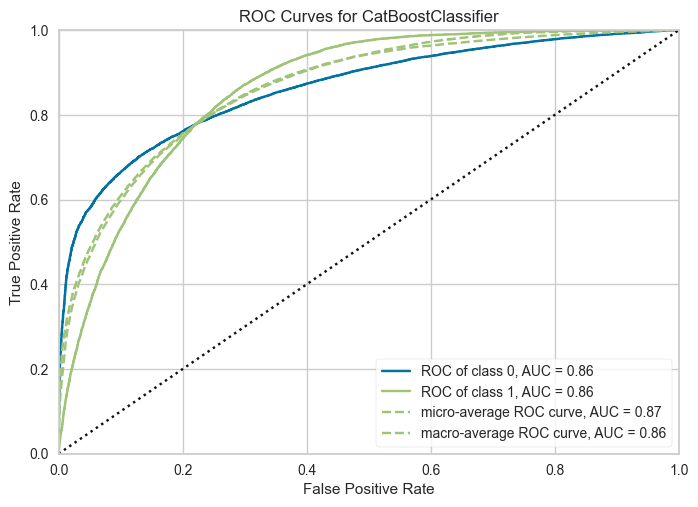

In [11]:
plot_model(catboost, plot = 'auc')

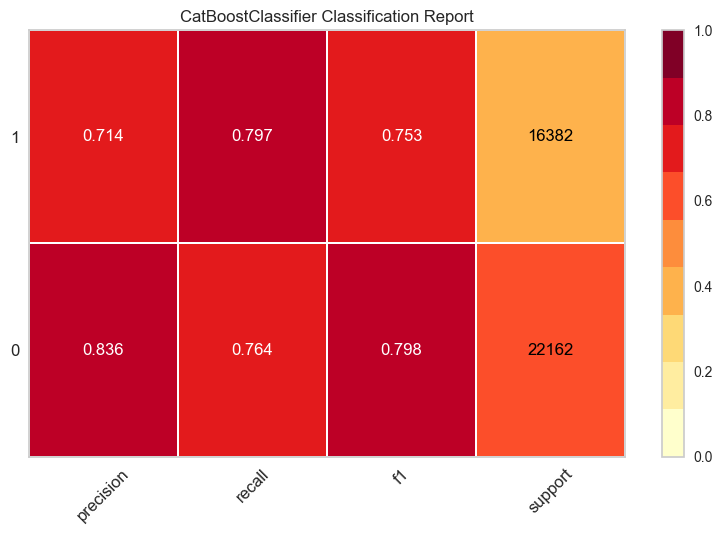

In [12]:
plot_model(catboost, plot = 'class_report')

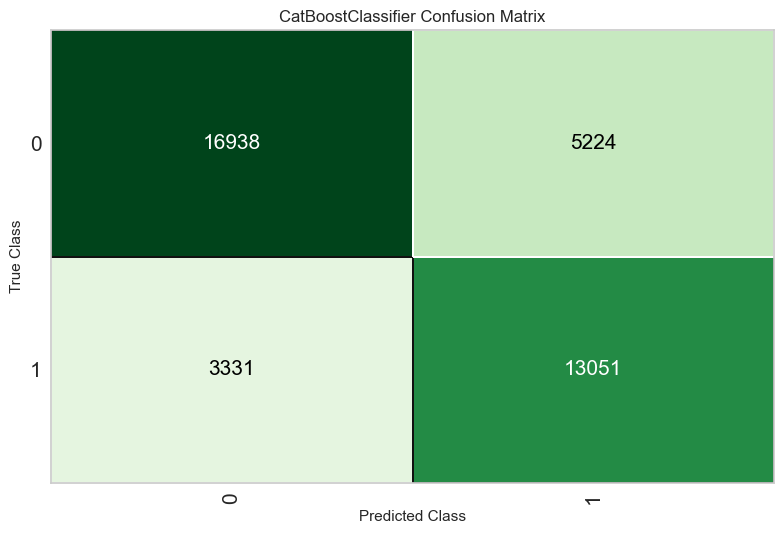

In [13]:
plot_model(catboost, plot = 'confusion_matrix')

In [14]:
final_catboost=finalize_model(catboost)
final_catboost

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'height(cm)', 'weight(kg)',
                                             'waist(cm)', 'eyesight(left)',
                                             'eyesight(right)', 'hearing(left)',
                                             'hearing(right)', 'systolic',
                                             'relaxation',
                                             'fasting blood sugar',
                                             'Cholesterol', 'triglyceride',
                                             'HDL', 'LDL', 'hemoglobin',
                                             'Urine protein',
                                             'serum creatinine',...
                                                              verbose='deprecated'))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x2bf2751e0>)],
         verbose=False)

In [15]:
predict_model(final_catboost, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8089,0.8936,0.8267,0.7495,0.7862,0.6143,0.6167


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.3974,0.6026
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7530,0.2470
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0543,0.9457
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.3481,0.6519
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4791,0.5209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2330,0.7670
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.8893,0.1107
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9959,0.0041
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9904,0.0096


In [16]:
tuned_catboost=tune_model(catboost,optimize = 'AUC',
                         n_iter = 20)
tuned_catboost

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7768,0.8607,0.7902,0.7148,0.7506,0.5496,0.5518
1,0.7796,0.8641,0.7835,0.7218,0.7514,0.5540,0.5555
2,0.7792,0.8631,0.7932,0.7173,0.7533,0.5544,0.5567
3,0.7813,0.8684,0.7940,0.7201,0.7553,0.5584,0.5606
4,0.7764,0.8608,0.7896,0.7144,0.7501,0.5488,0.5510
5,0.7769,0.8634,0.7892,0.7152,0.7504,0.5495,0.5517
6,0.7752,0.8594,0.7799,0.7163,0.7467,0.5453,0.5469
7,0.7799,0.8656,0.7927,0.7184,0.7537,0.5556,0.5578
8,0.7716,0.8601,0.7780,0.7116,0.7433,0.5383,0.5401


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
predict_model(tuned_catboost, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8058,0.8904,0.8241,0.7457,0.7829,0.6080,0.6105


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.4248,0.5752
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7409,0.2591
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0548,0.9452
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.2833,0.7167
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4837,0.5163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2372,0.7628
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.9087,0.0913
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9956,0.0044
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9897,0.0103


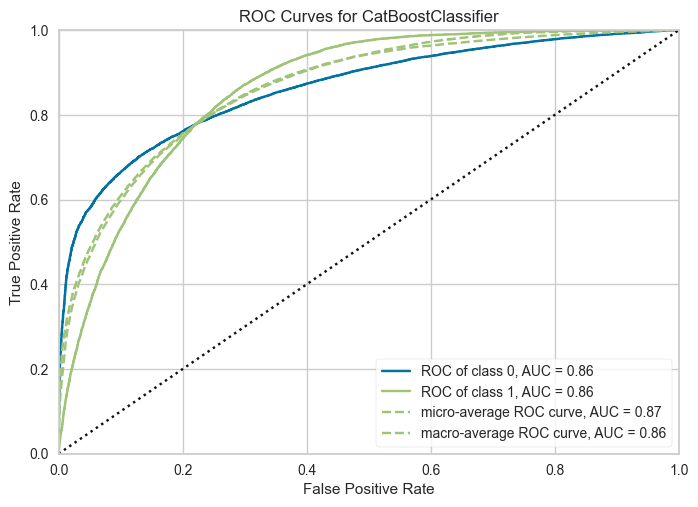

In [18]:
plot_model(tuned_catboost, plot = 'auc')

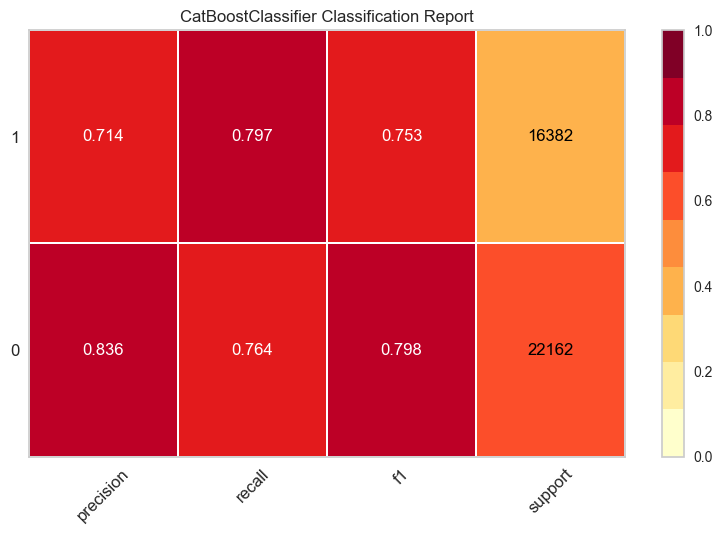

In [19]:
plot_model(tuned_catboost, plot = 'class_report')

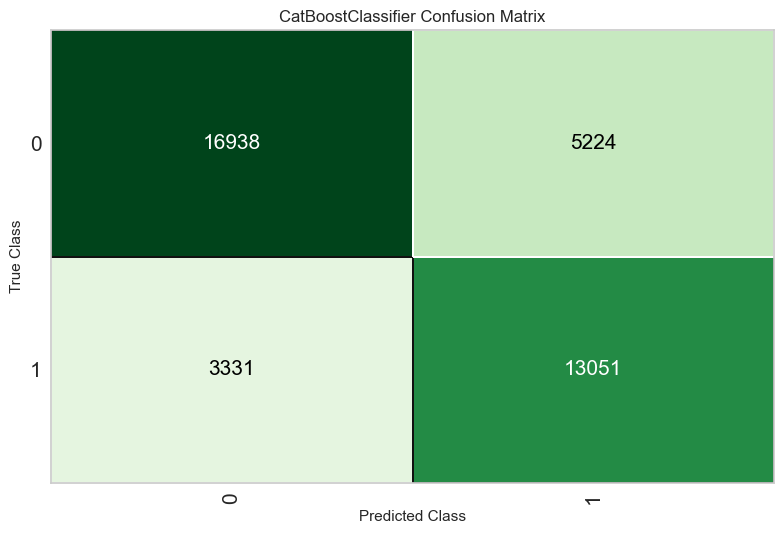

In [20]:
plot_model(tuned_catboost, plot = 'confusion_matrix')

In [21]:
final_tuned_catboost=finalize_model(tuned_catboost)
final_tuned_catboost

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'height(cm)', 'weight(kg)',
                                             'waist(cm)', 'eyesight(left)',
                                             'eyesight(right)', 'hearing(left)',
                                             'hearing(right)', 'systolic',
                                             'relaxation',
                                             'fasting blood sugar',
                                             'Cholesterol', 'triglyceride',
                                             'HDL', 'LDL', 'hemoglobin',
                                             'Urine protein',
                                             'serum creatinine',...
                                                              verbose='deprecated'))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x2cb3376d0>)],
         verbose=False)

In [22]:
predict_model(final_tuned_catboost, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8089,0.8936,0.8267,0.7495,0.7862,0.6143,0.6167


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.3974,0.6026
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7530,0.2470
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0543,0.9457
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.3481,0.6519
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4791,0.5209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2330,0.7670
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.8893,0.1107
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9959,0.0041
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9904,0.0096


In [23]:
tuned_catboost1=tune_model(catboost, search_library = 'optuna',optimize = 'AUC', n_iter = 20)
tuned_catboost1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7771,0.8604,0.7990,0.7118,0.7529,0.5511,0.5541
1,0.7792,0.8632,0.7900,0.7184,0.7525,0.5539,0.5560
2,0.7799,0.8641,0.7999,0.7157,0.7555,0.5565,0.5594
3,0.7833,0.8686,0.8027,0.7198,0.7590,0.5632,0.5660
4,0.7795,0.8613,0.7984,0.7156,0.7548,0.5555,0.5583
5,0.7780,0.8645,0.7988,0.7133,0.7536,0.5529,0.5558
6,0.7766,0.8588,0.7903,0.7144,0.7504,0.5492,0.5515
7,0.7799,0.8658,0.8008,0.7153,0.7557,0.5566,0.5596
8,0.7738,0.8606,0.7874,0.7112,0.7474,0.5435,0.5458


[I 2023-12-06 10:41:08,372] Searching the best hyperparameters using 154175 samples...
[I 2023-12-06 10:43:30,400] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
predict_model(tuned_catboost1, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8058,0.8904,0.8241,0.7457,0.7829,0.6080,0.6105


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.4248,0.5752
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7409,0.2591
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0548,0.9452
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.2833,0.7167
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4837,0.5163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2372,0.7628
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.9087,0.0913
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9956,0.0044
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9897,0.0103


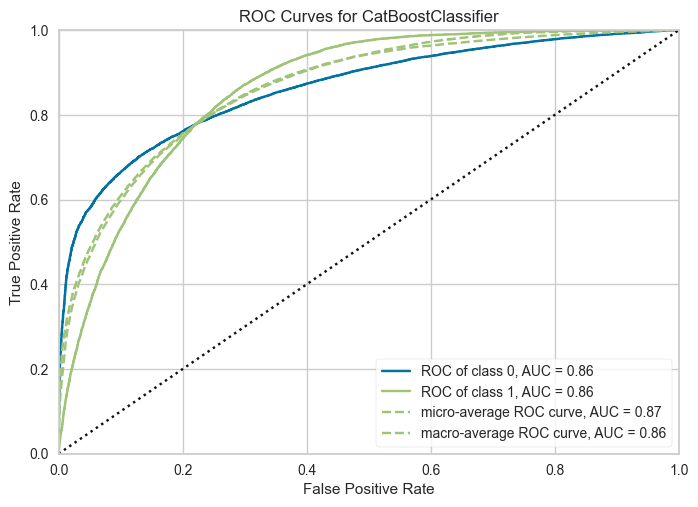

In [25]:
plot_model(tuned_catboost1, plot = 'auc')

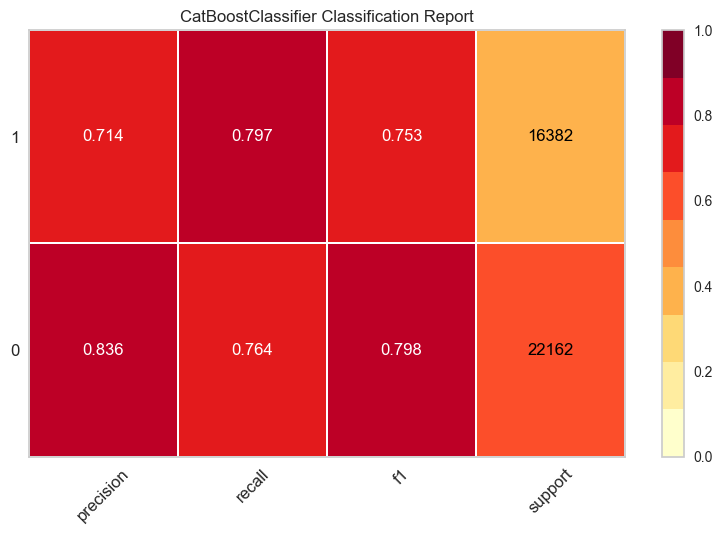

In [26]:
plot_model(tuned_catboost1, plot = 'class_report')

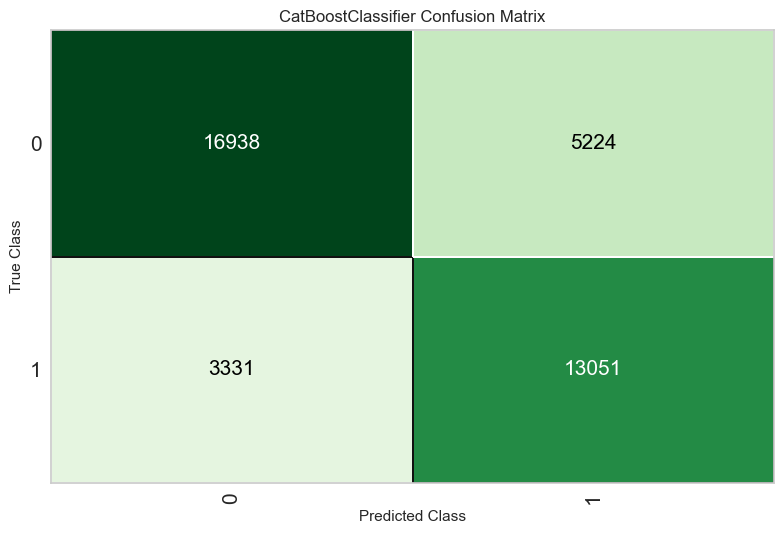

In [27]:
plot_model(tuned_catboost1, plot = 'confusion_matrix')

In [28]:
final_tuned_catboost1=finalize_model(tuned_catboost1)
final_tuned_catboost1

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'height(cm)', 'weight(kg)',
                                             'waist(cm)', 'eyesight(left)',
                                             'eyesight(right)', 'hearing(left)',
                                             'hearing(right)', 'systolic',
                                             'relaxation',
                                             'fasting blood sugar',
                                             'Cholesterol', 'triglyceride',
                                             'HDL', 'LDL', 'hemoglobin',
                                             'Urine protein',
                                             'serum creatinine',...
                                                              verbose='deprecated'))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[], include=None,
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 <catboost.core.CatBoostClassifier object at 0x2e2ed7580>)],
         verbose=False)

In [29]:
predict_model(final_tuned_catboost1, data = train,raw_score = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8089,0.8936,0.8267,0.7495,0.7862,0.6143,0.6167


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,smoking,prediction_label,prediction_score_0,prediction_score_1
0,55,165,60,81.000000,0.5,0.6,0,0,135,87,...,2.037037,3.000000,10.676471,1.099694,94.599998,6.125625,1,1,0.3974,0.6026
1,70,165,65,89.000000,0.6,0.7,1,1,146,83,...,1.853933,2.357143,13.341176,1.148136,135.800003,6.115154,0,0,0.7530,0.2470
2,20,170,75,81.000000,0.4,0.5,0,0,118,75,...,2.098765,8.500000,4.094118,0.968713,35.599998,4.546933,1,1,0.0543,0.9457
3,35,180,95,105.000000,1.2,1.5,0,0,131,88,...,1.714286,5.142857,6.547059,1.075435,63.000000,4.467790,0,1,0.3481,0.6519
4,30,165,60,80.500000,1.0,1.5,0,0,121,76,...,2.049690,5.500000,5.435294,0.993341,46.500000,5.490375,1,1,0.4791,0.5209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192714,40,170,65,77.000000,1.5,1.5,0,0,110,62,...,2.207792,4.250000,7.576470,0.917483,74.800003,4.890769,1,1,0.2330,0.7670
192715,40,165,60,80.000000,0.4,0.6,0,0,107,60,...,2.062500,4.125000,5.788235,0.892460,57.599998,4.855125,0,0,0.8893,0.1107
192716,45,155,55,75.000000,1.2,1.5,0,0,126,72,...,2.066667,3.444444,6.617647,1.037382,102.150002,5.503909,0,0,0.9959,0.0041
192717,40,160,55,75.000000,1.5,1.5,0,0,95,69,...,2.133333,4.000000,5.647059,0.792371,82.400002,4.421818,1,0,0.9904,0.0096


In [ ]:
# !pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
tuned_catboost2=tune_model(catboost, search_library = 'scikit-optimize',optimize = 'AUC', n_iter = 20)
tuned_catboost2

ModuleNotFoundError: 
'skopt' is a soft dependency and not included in the pycaret installation. Please run: `pip install scikit-optimize` to install.
Alternately, you can install this by running `pip install pycaret[tuners]`

In [ ]:
predict_model(tuned_catboost2, data = train,raw_score = True)

In [ ]:
plot_model(tuned_catboost2, plot = 'auc')

In [ ]:
plot_model(tuned_catboost2, plot = 'class_report')

In [ ]:
plot_model(tuned_catboost2, plot = 'confusion_matrix')

In [ ]:
final_tuned_catboost2=finalize_model(tuned_catboost2)
final_tuned_catboost2

In [ ]:
predict_model(final_tuned_catboost2, data = train,raw_score = True)

In [ ]:
final_tuned_catboost2_=predict_model(final_tuned_catboost2, data = test,raw_score = True)
final_tuned_catboost2_.head()

In [30]:
final_tuned_catboost1_=predict_model(final_tuned_catboost1, data = test,raw_score = True)
final_tuned_catboost1_.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,prediction_label,prediction_score_0,prediction_score_1
0,40,165,70,84.000000,1.2,1.2,0,0,130,89,...,0.0,1.964286,4.125000,6.682353,1.061792,80.000000,5.056071,1,0.4389,0.5611
1,80,160,60,93.000000,1.0,1.0,1,1,144,72,...,1.0,1.720430,2.000000,12.235294,1.173826,137.600006,6.144000,0,0.7570,0.2430
2,60,170,70,86.500000,0.6,0.7,0,0,117,75,...,0.0,1.965318,2.833333,10.870588,0.953734,96.599998,4.830429,0,0.6892,0.3108
3,40,160,50,67.000000,0.3,0.4,0,0,116,62,...,0.0,2.388060,4.000000,6.823529,0.947446,85.199997,5.939200,0,0.9803,0.0197
4,40,170,75,89.400002,0.9,1.0,0,0,132,94,...,0.0,1.901566,4.250000,7.764706,1.078128,68.000000,5.086400,1,0.3644,0.6356


In [31]:
final_tuned_catboost_=predict_model(final_tuned_catboost, data = test,raw_score = True)
final_tuned_catboost_.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,prediction_label,prediction_score_0,prediction_score_1
0,40,165,70,84.000000,1.2,1.2,0,0,130,89,...,0.0,1.964286,4.125000,6.682353,1.061792,80.000000,5.056071,1,0.4389,0.5611
1,80,160,60,93.000000,1.0,1.0,1,1,144,72,...,1.0,1.720430,2.000000,12.235294,1.173826,137.600006,6.144000,0,0.7570,0.2430
2,60,170,70,86.500000,0.6,0.7,0,0,117,75,...,0.0,1.965318,2.833333,10.870588,0.953734,96.599998,4.830429,0,0.6892,0.3108
3,40,160,50,67.000000,0.3,0.4,0,0,116,62,...,0.0,2.388060,4.000000,6.823529,0.947446,85.199997,5.939200,0,0.9803,0.0197
4,40,170,75,89.400002,0.9,1.0,0,0,132,94,...,0.0,1.901566,4.250000,7.764706,1.078128,68.000000,5.086400,1,0.3644,0.6356


In [32]:
catboost_=predict_model(catboost, data = test,raw_score = True)
catboost_.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,prediction_label,prediction_score_0,prediction_score_1
0,40,165,70,84.000000,1.2,1.2,0,0,130,89,...,0.0,1.964286,4.125000,6.682353,1.061792,80.000000,5.056071,1,0.4127,0.5873
1,80,160,60,93.000000,1.0,1.0,1,1,144,72,...,1.0,1.720430,2.000000,12.235294,1.173826,137.600006,6.144000,0,0.7325,0.2675
2,60,170,70,86.500000,0.6,0.7,0,0,117,75,...,0.0,1.965318,2.833333,10.870588,0.953734,96.599998,4.830429,0,0.6699,0.3301
3,40,160,50,67.000000,0.3,0.4,0,0,116,62,...,0.0,2.388060,4.000000,6.823529,0.947446,85.199997,5.939200,0,0.9781,0.0219
4,40,170,75,89.400002,0.9,1.0,0,0,132,94,...,0.0,1.901566,4.250000,7.764706,1.078128,68.000000,5.086400,1,0.3936,0.6064


In [33]:
final_catboost_=predict_model(final_catboost, data = test,raw_score = True)
final_catboost_.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,average_hearing,ratio of height and waist,ratio of height and age,hemoglobin level by age group,ratio of systolic and age,intersection between age and Cholesterol,ratio of systolic and BMI,prediction_label,prediction_score_0,prediction_score_1
0,40,165,70,84.000000,1.2,1.2,0,0,130,89,...,0.0,1.964286,4.125000,6.682353,1.061792,80.000000,5.056071,1,0.4389,0.5611
1,80,160,60,93.000000,1.0,1.0,1,1,144,72,...,1.0,1.720430,2.000000,12.235294,1.173826,137.600006,6.144000,0,0.7570,0.2430
2,60,170,70,86.500000,0.6,0.7,0,0,117,75,...,0.0,1.965318,2.833333,10.870588,0.953734,96.599998,4.830429,0,0.6892,0.3108
3,40,160,50,67.000000,0.3,0.4,0,0,116,62,...,0.0,2.388060,4.000000,6.823529,0.947446,85.199997,5.939200,0,0.9803,0.0197
4,40,170,75,89.400002,0.9,1.0,0,0,132,94,...,0.0,1.901566,4.250000,7.764706,1.078128,68.000000,5.086400,1,0.3644,0.6356


In [34]:
sol.head()

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5


In [35]:
sol['smoking']=final_catboost_['prediction_score_1']
sol.head()

,id,smoking
0,159256,0.5611
1,159257,0.2430
2,159258,0.3108
3,159259,0.0197
4,159260,0.6356


In [36]:
sol.to_csv('pycaret.csv',index=False)